In [1]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-01-g3"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/Embeded_FS/EmbededFS_results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['.ipynb_checkpoints', 'catboost_info', 'EGFR_subtypes_prediction_383cases_01_newKNN14.ipynb', 'EGFR_subtypes_prediction_383cases_01_newKNN141.ipynb', 'EGFR_subtypes_prediction_383cases_01_newLR13.ipynb', 'EGFR_subtypes_prediction_383cases_01_newLR131.ipynb', 'EGFR_subtypes_prediction_383cases_01_newNB15.ipynb', 'EGFR_subtypes_prediction_383cases_01_newNB151.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF12.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF121.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF2-14.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF2-141.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF23.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF231.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSTACK19.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSTACK191.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSVM19.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSVM191.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSVM192.ipynb', 'Embeded-FS-

In [2]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [3]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'NB15'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/Embeded_FS/EmbededFS_results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/train-zscore.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/test-Zscore.csv")
# test1 = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testrj1921new_zscore.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
# test1=test1[data.keys()]
# test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/new-auc/trainZscore-NB15.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/new-auc/testZscore-NB15.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/testrjZscore-SVM20.csv",index=None)



In [4]:
test.shape

(60, 16)

In [5]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [7]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/new-auc/trainZscore-NB15.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   CT_wavelet-LHL_firstorder_10Percentile                 322 non-null    float64
 1   CT_wavelet2-HHL_glcm_ClusterShade                      322 non-null    float64
 2   CT_original_firstorder_90Percentile                    322 non-null    float64
 3   CT_wavelet-HHL_ngtdm_Strength                          322 non-null    float64
 4   CT_lbp-3D-k_glcm_ClusterShade                          322 non-null    float64
 5   CT_wavelet-HHL_firstorder_Kurtosis                     322 non-null    float64
 6   CT_original_gldm_SmallDependenceHighGrayLevelEmphasis  322 non-null    float64
 7   PET_original_shape_Elongation                          322 non-null    float64
 8   PET_original_glcm_JointEnergy                     

count   mean   std  \
CT_wavelet-LHL_firstorder_10Percentile             322.000  0.000 1.002   
CT_wavelet2-HHL_glcm_ClusterShade                  322.000 -0.000 1.002   
CT_original_firstorder_90Percentile                322.000  0.000 1.002   
CT_wavelet-HHL_ngtdm_Strength                      322.000  0.000 1.002   
CT_lbp-3D-k_glcm_ClusterShade                      322.000  0.000 1.002   
CT_wavelet-HHL_firstorder_Kurtosis                 322.000 -0.000 1.002   
CT_original_gldm_SmallDependenceHighGrayLevelEm... 322.000  0.000 1.002   
PET_original_shape_Elongation                      322.000  0.000 1.002   
PET_original_glcm_JointEnergy                      322.000  0.000 1.002   
CT_wavelet-LHL_glcm_ClusterShade                   322.000 -0.000 1.002   
CT_original_shape_SurfaceVolumeRatio               322.000  0.000 1.002   
CT_wavelet-LLH_firstorder_Maximum                  322.000 -0.000 1.002   
CT_wavelet-HLH_glszm_SizeZoneNonUniformityNorma... 322.000 -0.000 1.002   
CT_lbp-3D-m1_glszm_SmallAreaEmphasis               322.000  0.000 1.002   
CT_lbp-3D-m2_firstorder_90Percentile               322.000 -0.000 1.002   
label                                              322.000  0.435 0.497   

                                                      min    10%    25%  \
CT_wavelet-LHL_firstorder_10Percentile             -4.470 -1.263 -0.542   
CT_wavelet2-HHL_glcm_ClusterShade                  -4.360 -0.584 -0.085   
CT_original_firstorder_90Percentile                -8.443 -0.980 -0.118   
CT_wavelet-HHL_ngtdm_Strength                      -0.641 -0.586 -0.527   
CT_lbp-3D-k_glcm_ClusterShade                      -3.850 -1.602 -0.289   
CT_wavelet-HHL_firstorder_Kurtosis                 -0.653 -0.455 -0.376   
CT_original_gldm_SmallDependenceHighGrayLevelEm... -1.700 -1.068 -0.742   
PET_original_shape_Elongation                      -4.235 -1.283 -0.563   
PET_original_glcm_JointEnergy                      -0.380 -0.363 -0.330   
CT_wavelet-LHL_glcm_ClusterShade                   -8.923 -0.490 -0.037   
CT_original_shape_SurfaceVolumeRatio               -1.980 -1.341 -0.851   
CT_wavelet-LLH_firstorder_Maximum                  -2.181 -1.114 -0.685   
CT_wavelet-HLH_glszm_SizeZoneNonUniformityNorma... -2.110 -1.140 -0.699   
CT_lbp-3D-m1_glszm_SmallAreaEmphasis               -0.229 -0.229 -0.229   
CT_lbp-3D-m2_firstorder_90Percentile               -3.976 -1.311 -0.617   
label                                               0.000  0.000  0.000   

                                                      50%    75%    90%   95%  \
CT_wavelet-LHL_firstorder_10Percentile              0.284  0.727  1.007 1.136   
CT_wavelet2-HHL_glcm_ClusterShade                   0.042  0.126  0.405 0.898   
CT_original_firstorder_90Percentile                 0.265  0.490  0.726 0.872   
CT_wavelet-HHL_ngtdm_Strength                      -0.362  0.020  0.966 1.937   
CT_lbp-3D-k_glcm_ClusterShade                       0.256  0.654  0.956 1.105   
CT_wavelet-HHL_firstorder_Kurtosis                 -0.224  0.046  0.372 0.870   
CT_original_gldm_SmallDependenceHighGrayLevelEm... -0.278  0.824  1.431 1.929   
PET_original_shape_Elongation                       0.108  0.670  1.176 1.338   
PET_original_glcm_JointEnergy                      -0.225 -0.017  0.408 0.850   
CT_wavelet-LHL_glcm_ClusterShade                    0.123  0.180  0.291 0.470   
CT_original_shape_SurfaceVolumeRatio                0.135  0.759  1.253 1.566   
CT_wavelet-LLH_firstorder_Maximum                  -0.103  0.525  1.305 1.878   
CT_wavelet-HLH_glszm_SizeZoneNonUniformityNorma... -0.251  0.778  1.428 1.615   
CT_lbp-3D-m1_glszm_SmallAreaEmphasis               -0.229 -0.229 -0.229 0.520   
CT_lbp-3D-m2_firstorder_90Percentile               -0.026  0.608  1.428 1.573   
label                                               0.000  1.000  1.000 1.000   

                                                     99%    max  
CT_wavelet-LHL_firstorder_10Percentile             1.356 

In [8]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_wavelet-LHL_firstorder_10Percentile                   0
CT_wavelet2-HHL_glcm_ClusterShade                        0
CT_original_firstorder_90Percentile                      0
CT_wavelet-HHL_ngtdm_Strength                            0
CT_lbp-3D-k_glcm_ClusterShade                            0
CT_wavelet-HHL_firstorder_Kurtosis                       0
CT_original_gldm_SmallDependenceHighGrayLevelEmphasis    0
PET_original_shape_Elongation                            0
PET_original_glcm_JointEnergy                            0
CT_wavelet-LHL_glcm_ClusterShade                         0
CT_original_shape_SurfaceVolumeRatio                     0
CT_wavelet-LLH_firstorder_Maximum                        0
CT_wavelet-HLH_glszm_SizeZoneNonUniformityNormalized     0
CT_lbp-3D-m1_glszm_SmallAreaEmphasis                     0
CT_lbp-3D-m2_firstorder_90Percentile                     0
label                                                    0
dtype: int64

In [22]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.622500
Naive Bayes: 0.612500
KNN: 0.570000
SVM: 0.672500
ANN: 0.560000
CART: 0.595000
BaggedTrees: 0.647500
RF: 0.590000
AdaBoost: 0.737500
GBM: 0.612500
XGBoost: 0.612500
LightGBM: 0.642500
CatBoost: 0.657500
NGBoost: 0.702500

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.607          0.622
1          Naive Bayes           0.590          0.612
2                  KNN           0.709          0.570
3                  SVM           0.704          0.672
4                  ANN           0.805          0.560
5                 CART           1.000          0.595
6          BaggedTrees           0.970          0.648
7                   RF           1.000          0.590
8             AdaBoost           0.892          0.738
9                  GBM           1.000          0.613
10

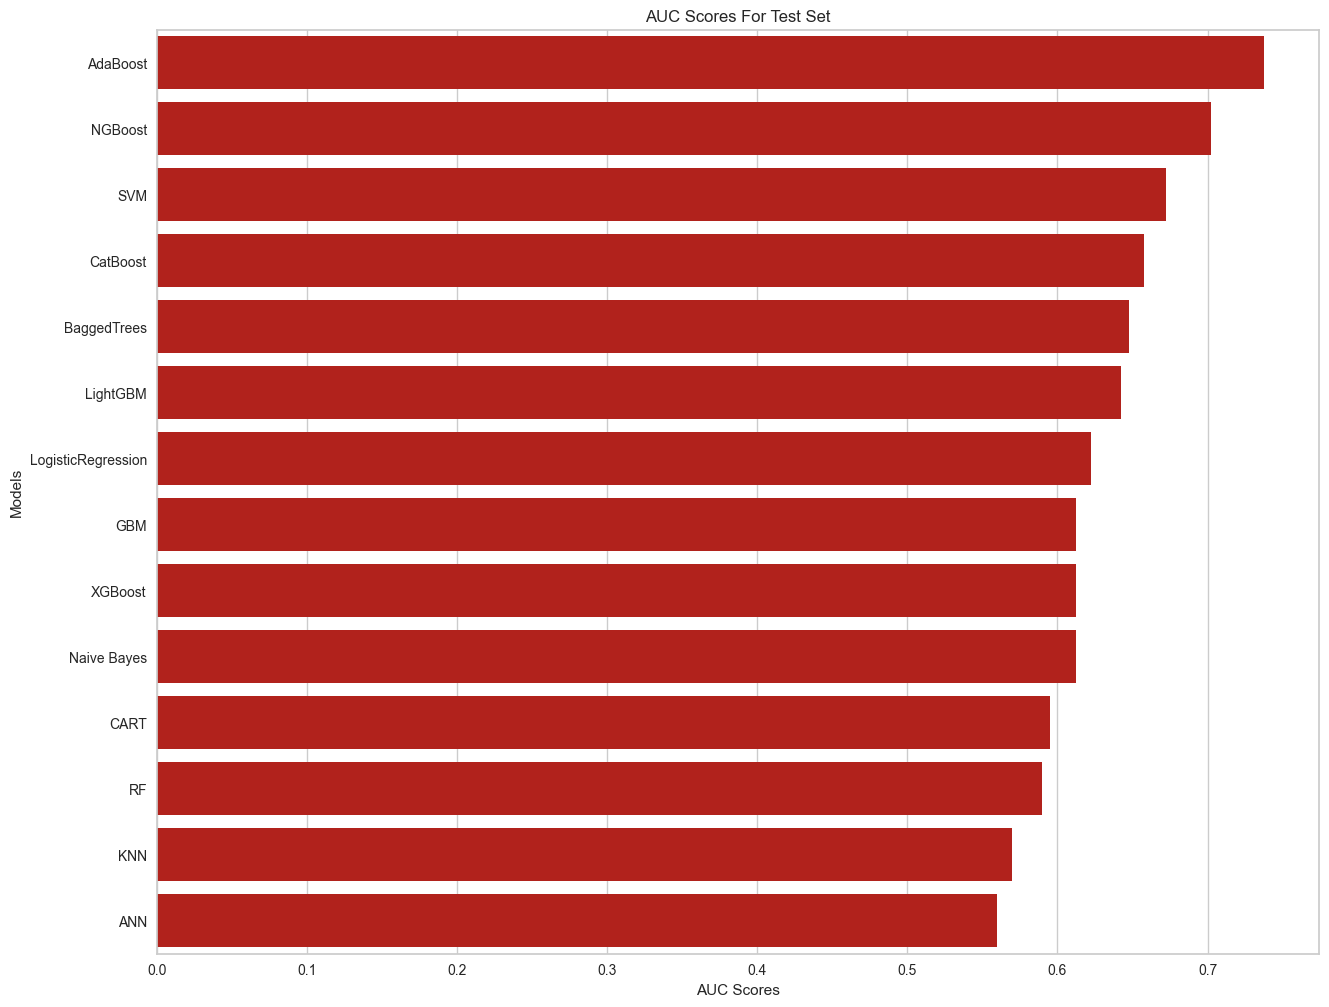

In [23]:
evaluate_classification_model_holdout(base_models)


In [24]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [26]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.5975

In [27]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB15-LR73', Save_format = 'csv',Save_type = 'col')

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB15-LR73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.67      0.88      0.76        40
EGFR Mutated       0.62      0.32      0.42        25

    accuracy                           0.66        65
   macro avg       0.64      0.60      0.59        65
weighted avg       0.65      0.66      0.63        65

precision 0.6153846153846154 accuracy 0.6615384615384615 recall 0.32 auc 0.5975


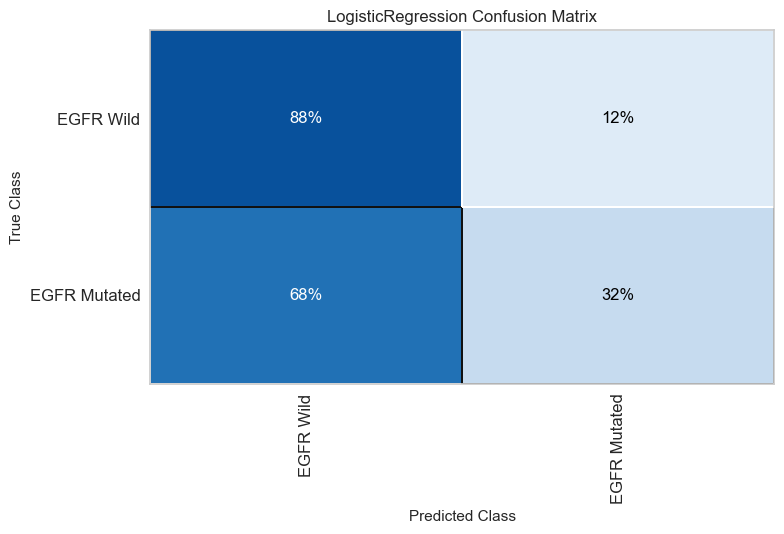

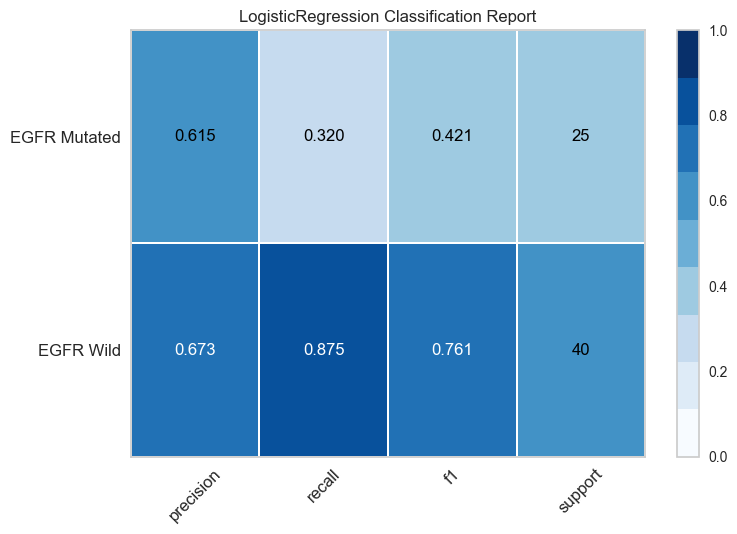

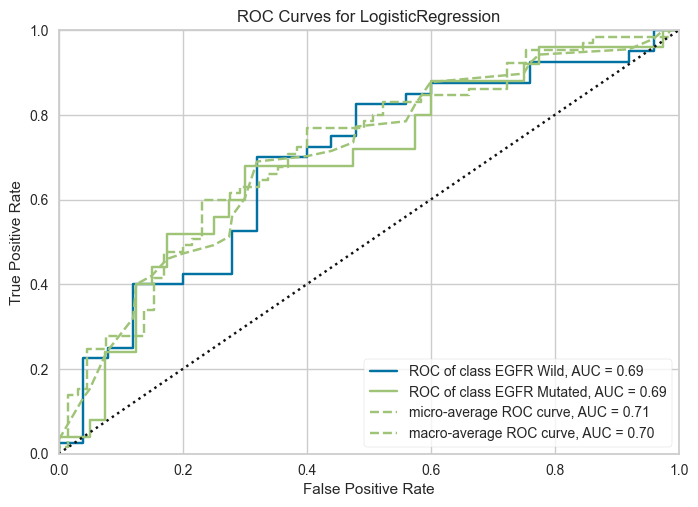

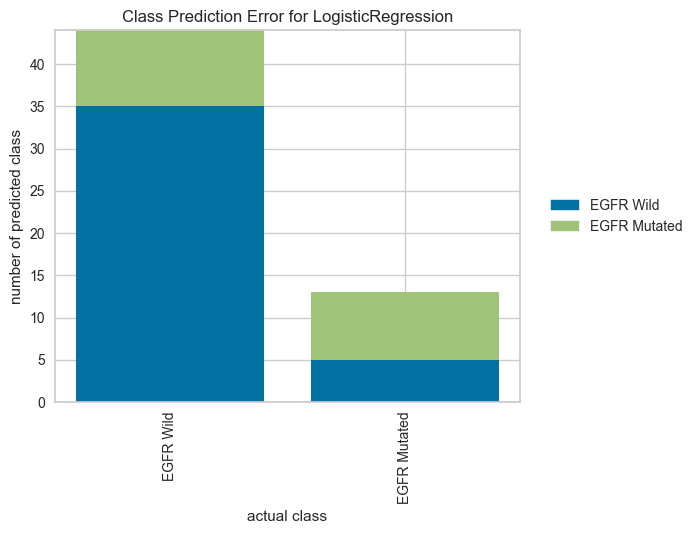

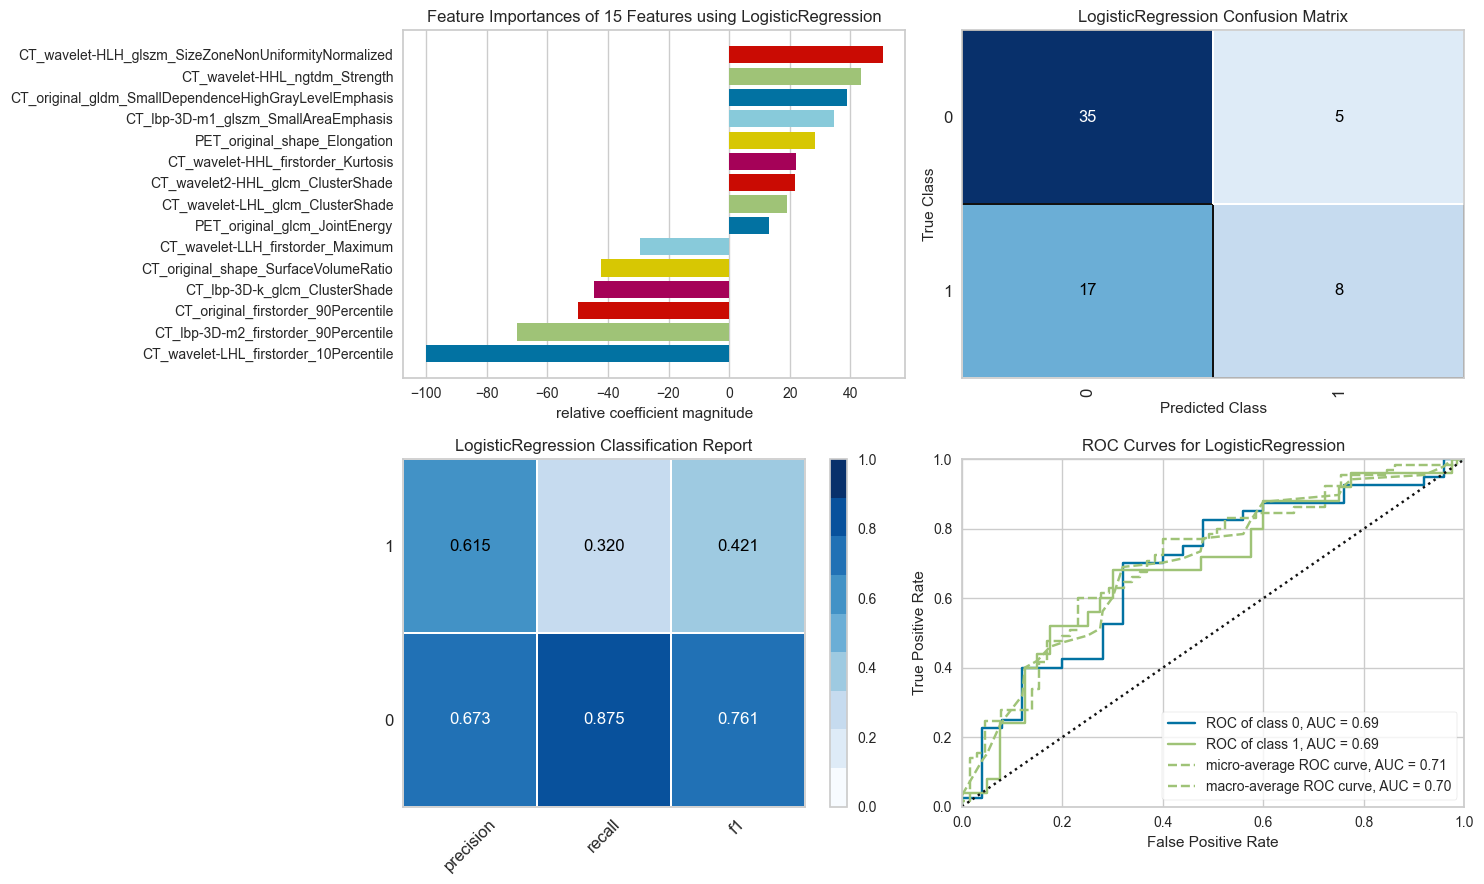

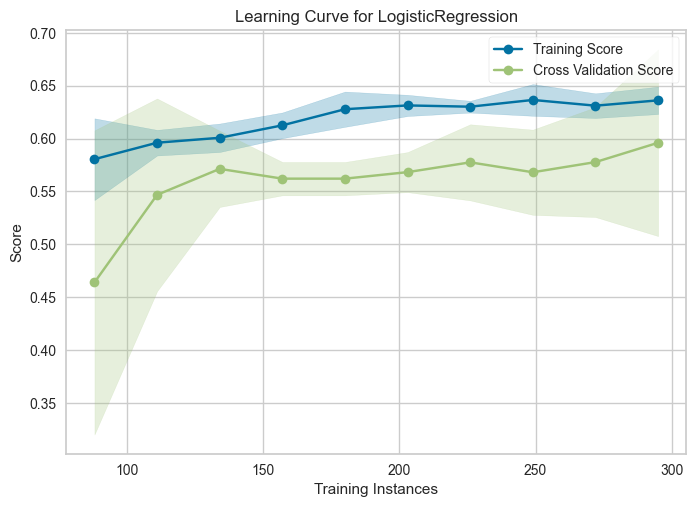

In [29]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [32]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.675

In [33]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB15-RF73', Save_format = 'csv',Save_type = 'col')

In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB15-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.75      0.75      0.75        40
EGFR Mutated       0.60      0.60      0.60        25

    accuracy                           0.69        65
   macro avg       0.68      0.68      0.68        65
weighted avg       0.69      0.69      0.69        65

precision 0.6 accuracy 0.6923076923076923 recall 0.6 auc 0.675


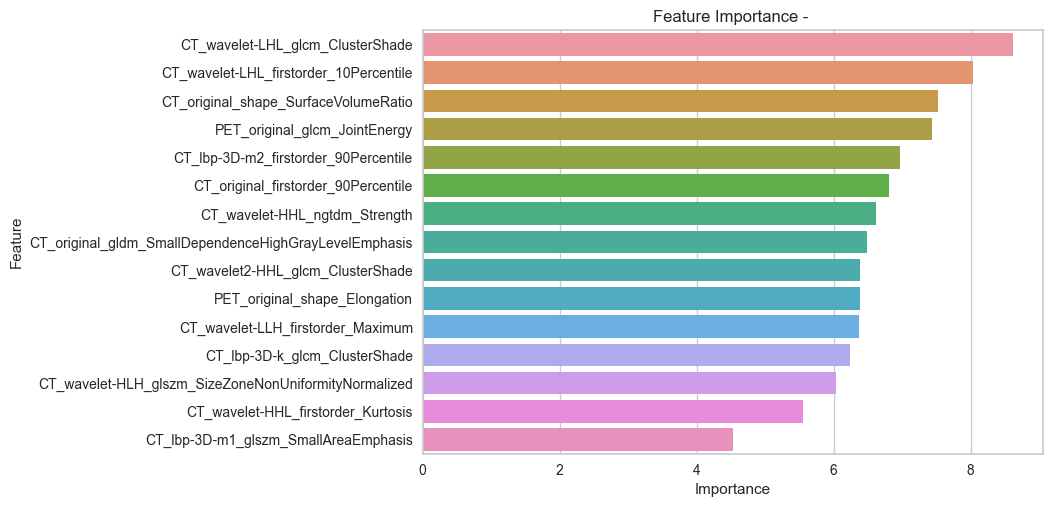

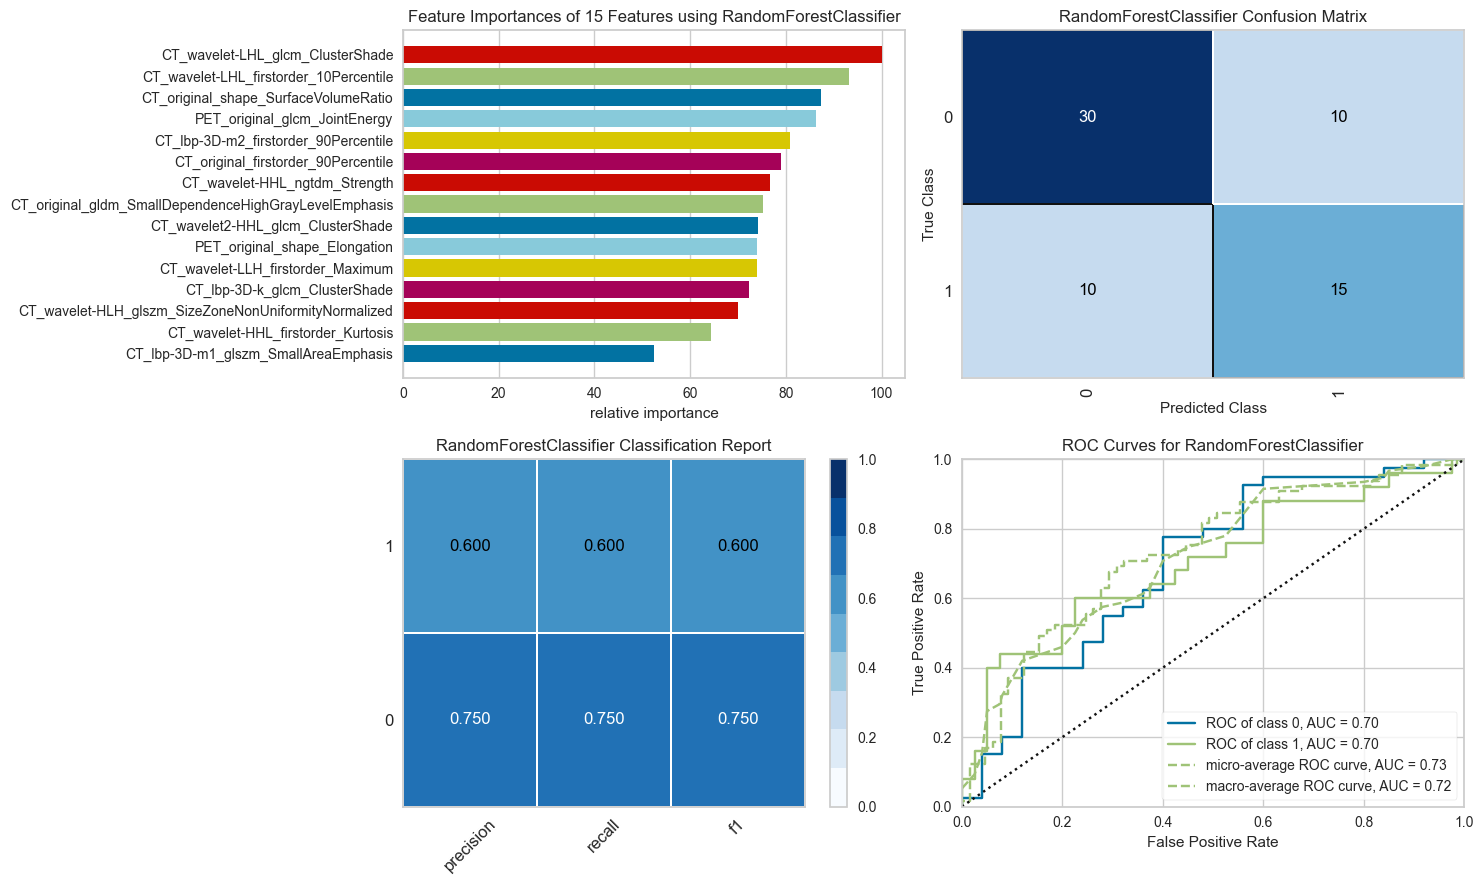

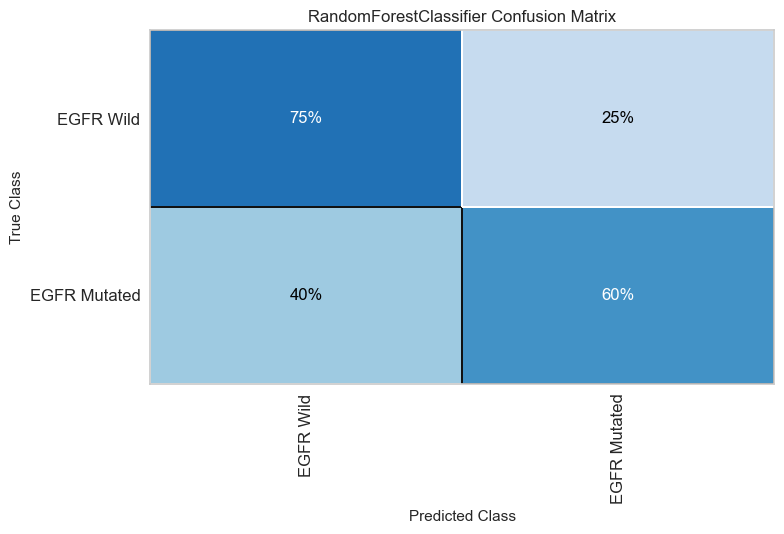

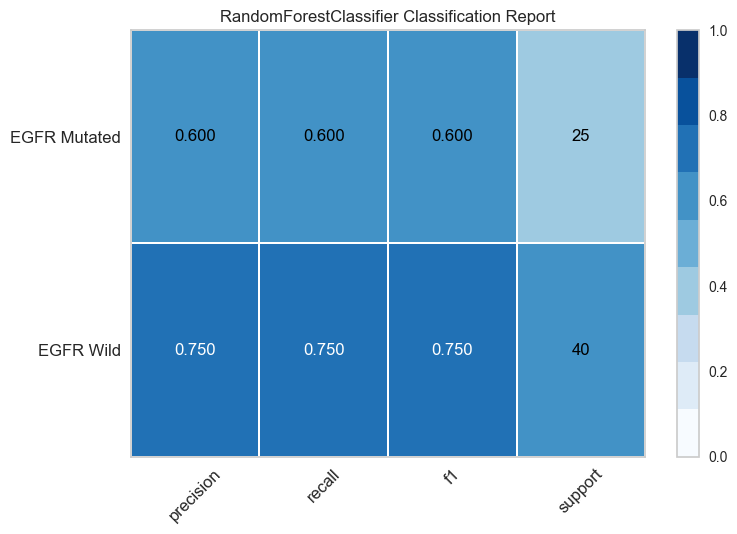

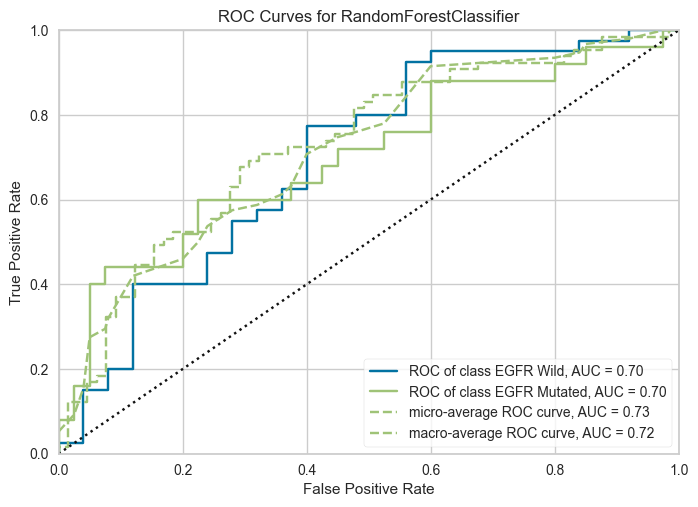

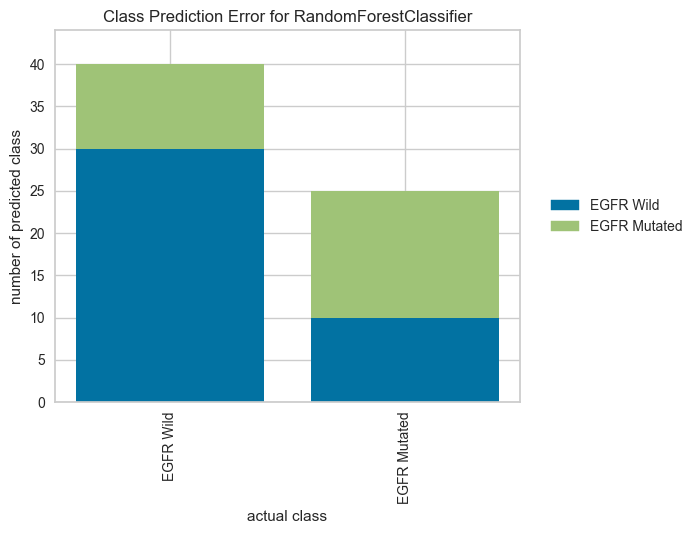

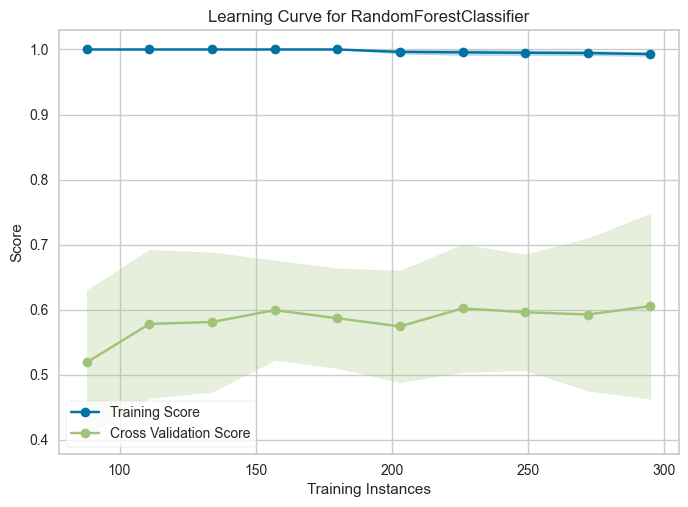

In [35]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [25]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6594290	total: 8.06ms	remaining: 1.6s
1:	learn: 0.6232533	total: 10.7ms	remaining: 1.05s
2:	learn: 0.5937282	total: 13.1ms	remaining: 859ms
3:	learn: 0.5685904	total: 15.5ms	remaining: 761ms
4:	learn: 0.5408406	total: 18.1ms	remaining: 706ms
5:	learn: 0.5166241	total: 20.9ms	remaining: 676ms
6:	learn: 0.4987814	total: 23.8ms	remaining: 656ms
7:	learn: 0.4743194	total: 26.5ms	remaining: 636ms
8:	learn: 0.4582486	total: 29.1ms	remaining: 617ms
9:	learn: 0.4347149	total: 31.6ms	remaining: 601ms
10:	learn: 0.4216608	total: 34ms	remaining: 585ms
11:	learn: 0.4078337	total: 36.8ms	remaining: 577ms
12:	learn: 0.3957479	total: 39.3ms	remaining: 565ms
13:	learn: 0.3792314	total: 41.6ms	remaining: 552ms
14:	learn: 0.3693311	total: 44.1ms	remaining: 544ms
15:	learn: 0.3554575	total: 46.6ms	remaining: 536ms
16:	learn: 0.3440330	total: 49.1ms	remaining: 528ms
17:	learn: 0.3286225	total: 51.4ms	remaining: 520ms
18:	learn: 0.3164215	total: 53.7ms	remaining: 512ms
19:	learn: 0.3077136	tota

0.7384615384615385

In [26]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [27]:
# shap.dependence_plot(y_train, shap_values, X_train)

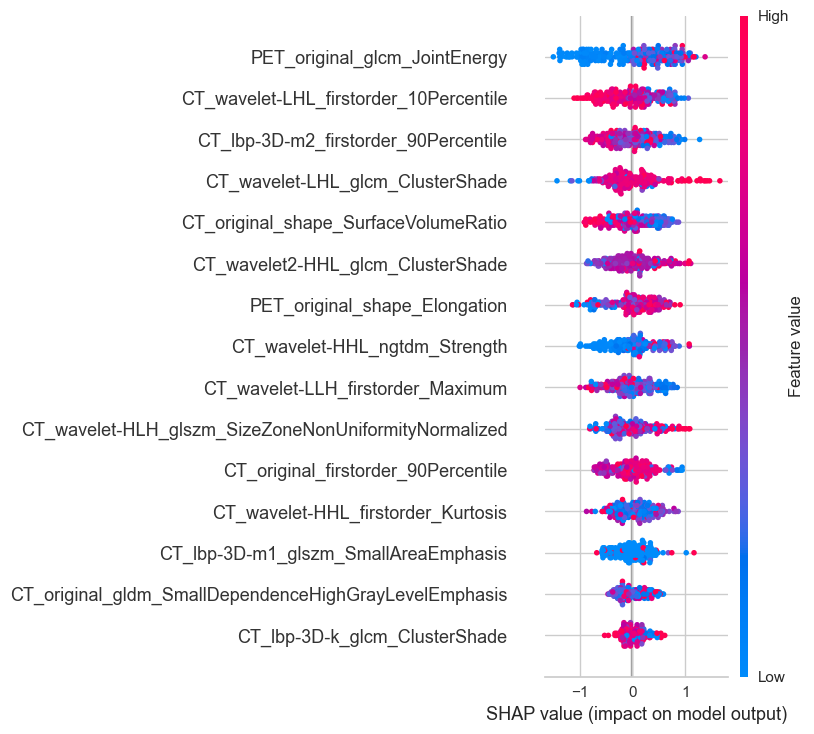

In [28]:

shap.summary_plot(shap_values, X_train)

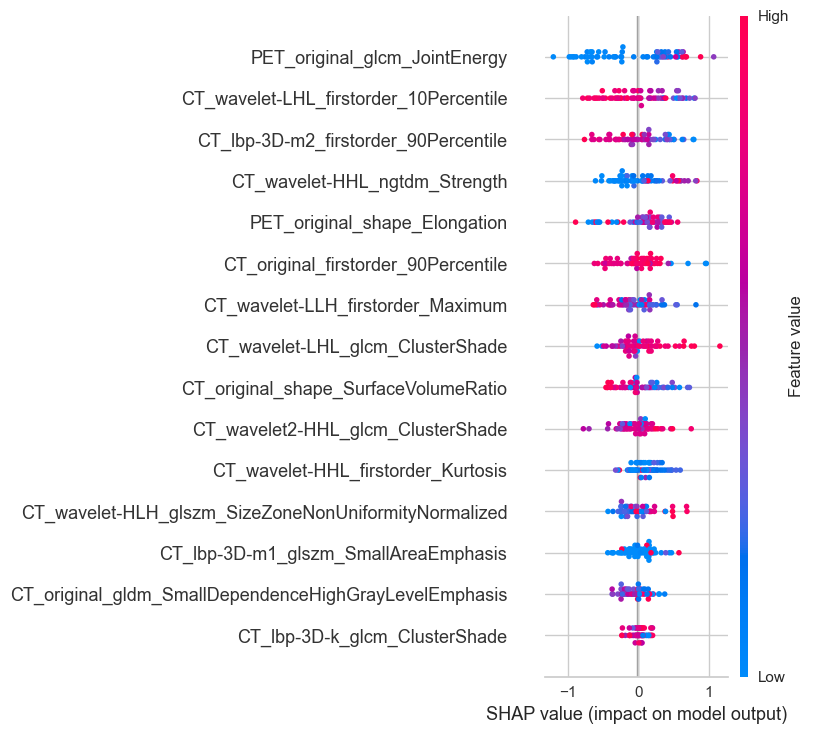

In [29]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [30]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [31]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB15-CBC73', Save_format = 'csv',Save_type = 'col')

In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB15-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.78      0.80      0.79        40
EGFR Mutated       0.67      0.64      0.65        25

    accuracy                           0.74        65
   macro avg       0.72      0.72      0.72        65
weighted avg       0.74      0.74      0.74        65

precision 0.6666666666666666 accuracy 0.7384615384615385 recall 0.64 auc 0.7200000000000002


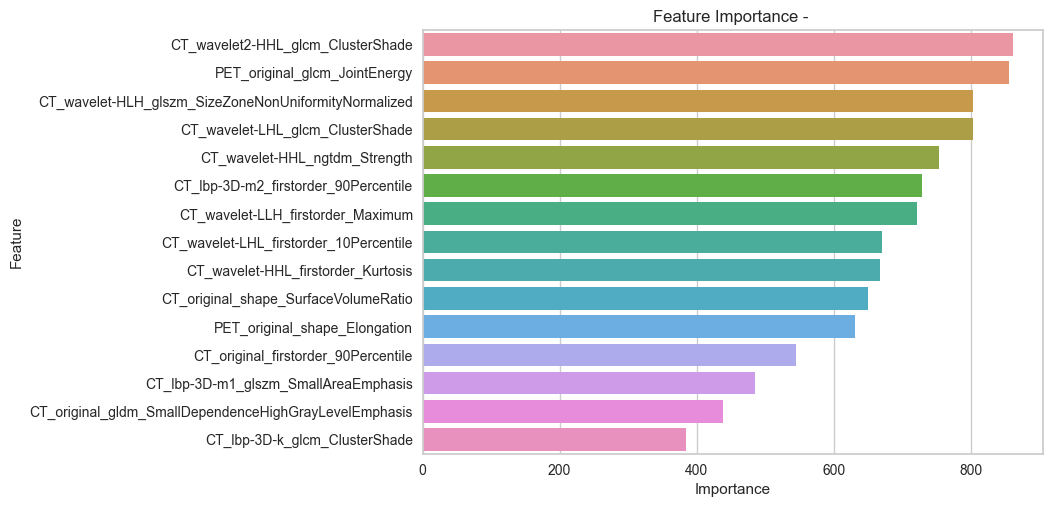

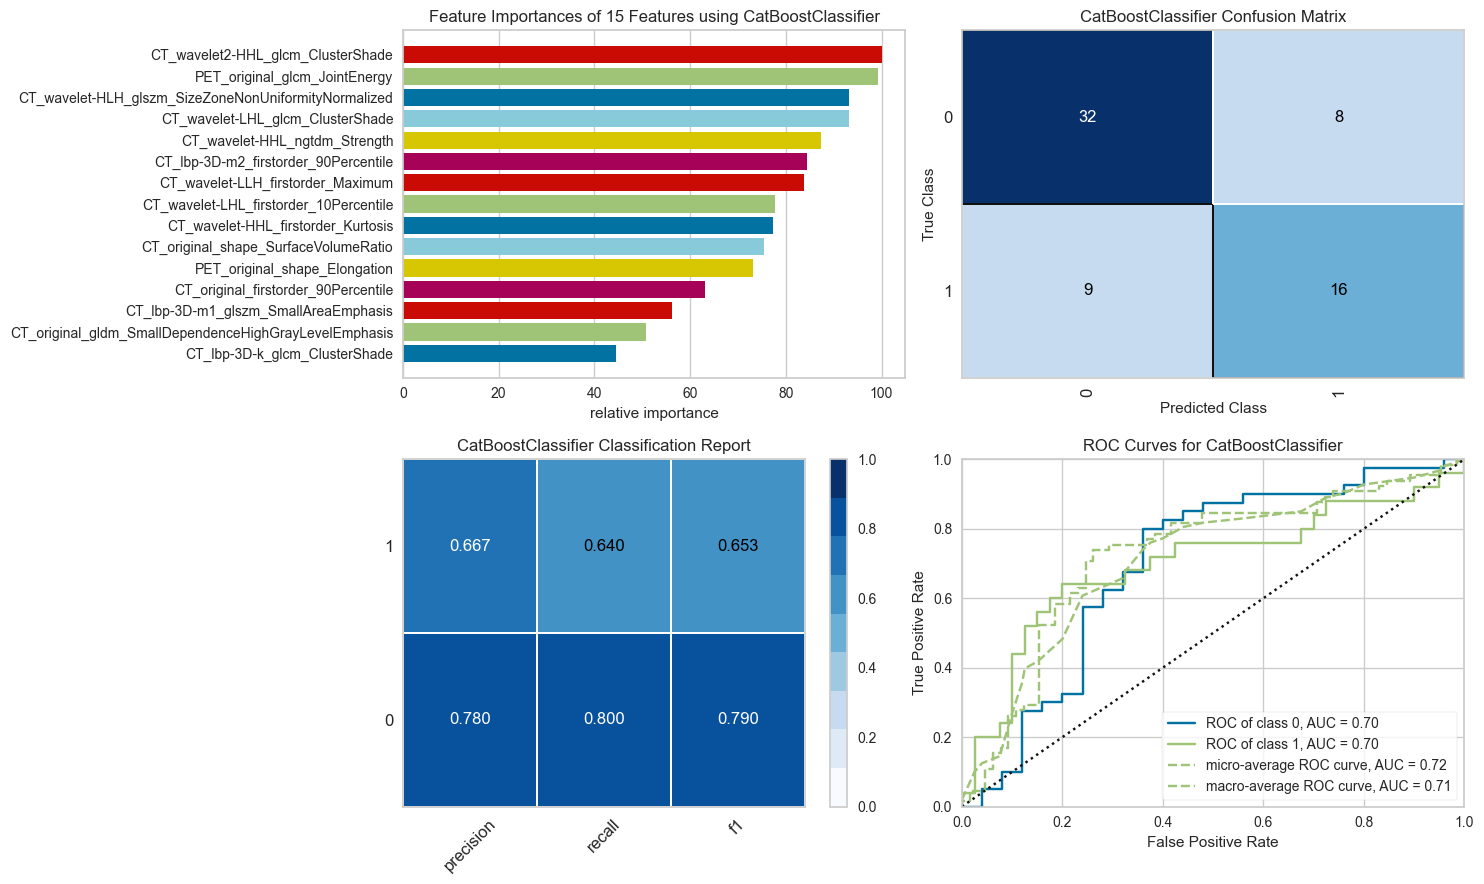

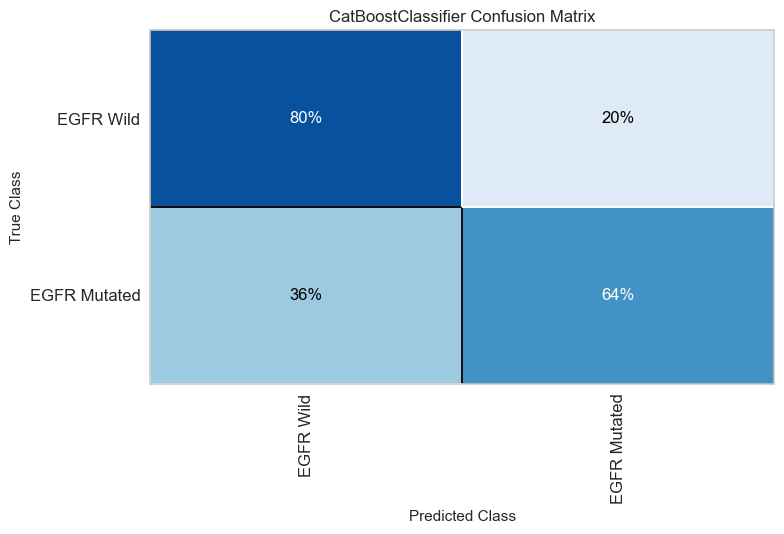

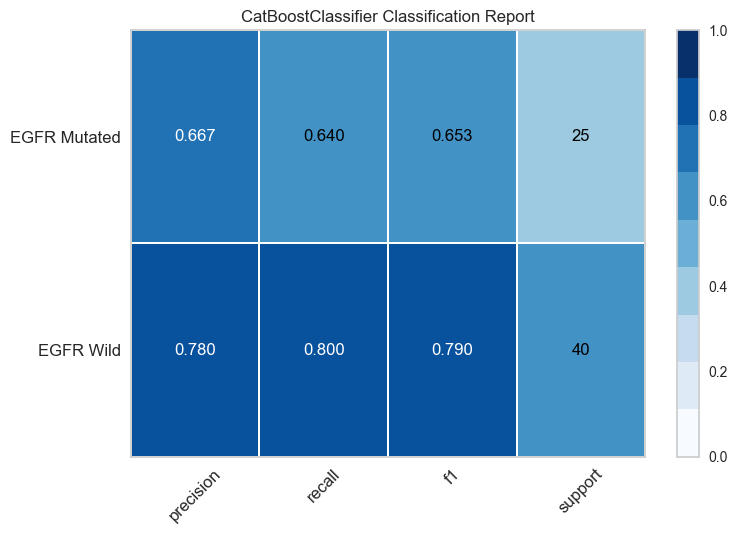

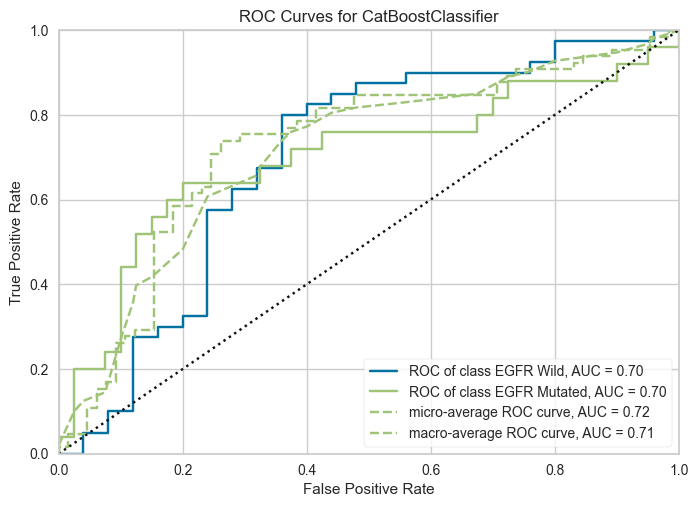

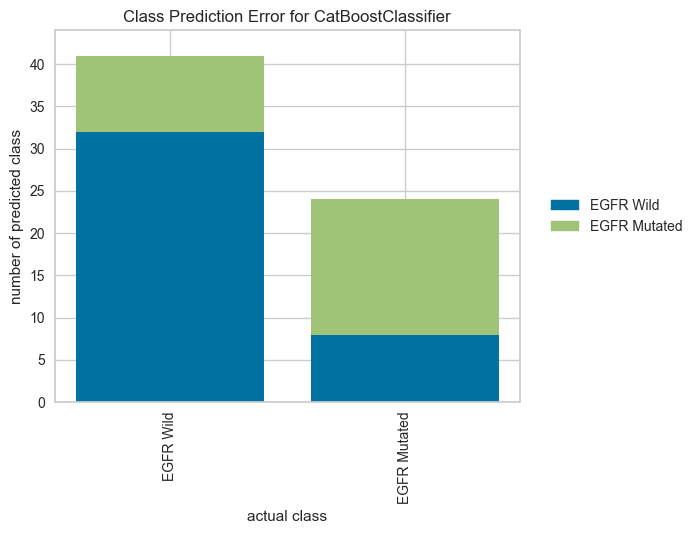

TypeError: __init__() got an unexpected keyword argument 'iterations'

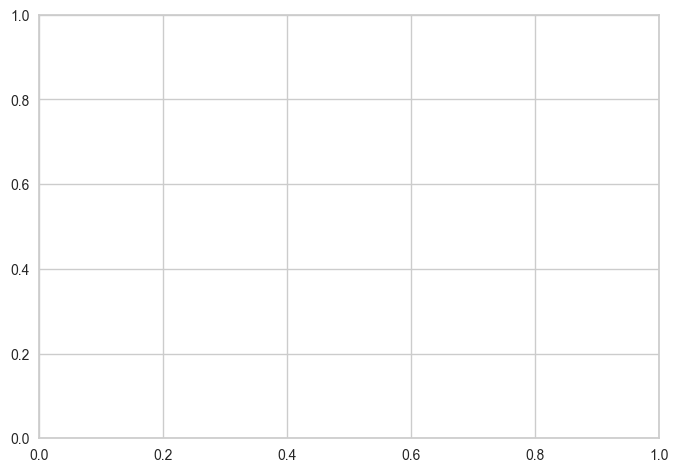

In [33]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [37]:
# Final Model
ngb_tuned = NGBClassifier(**ngb_cv_model.best_params_).fit(X_train, y_train)
y_pred = ngb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

[iter 0] loss=0.6876 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.2304 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 200] loss=0.2304 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 300] loss=0.2304 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 400] loss=0.2304 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 500] loss=0.2303 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 600] loss=0.2303 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 700] loss=0.2303 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 800] loss=0.2303 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 900] loss=0.2303 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 1000] loss=0.2303 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 1100] loss=0.2303 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 1200] loss=0.2303 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1300] loss=0.2303 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 1400] loss=0.2303 val_loss=0.0000 scale=0.0005 norm=0.0006
[iter 1500] loss=0.2303 val_loss=0.00

0.6615384615384615

In [38]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB15-NGB73', Save_format = 'csv',Save_type = 'col')

In [39]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB15-NGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.74      0.70      0.72        40
EGFR Mutated       0.56      0.60      0.58        25

    accuracy                           0.66        65
   macro avg       0.65      0.65      0.65        65
weighted avg       0.67      0.66      0.66        65

precision 0.5555555555555556 accuracy 0.6615384615384615 recall 0.6 auc 0.6499999999999999


In [40]:
# # # # Visualization of Results --> Feature Importances
# # # ngb_tuned = wrap(ngb_tuned)
# # # # plot_feature_importances(ngb_tuned)

# # # report_results_quickly(ngb_tuned)
# # # plot_results(ngb_tuned)
# # # plot_learning_curve(ngb_tuned)

# plot_confusion_matrix_yb(ngb_tuned)
# plot_classification_report_yb(ngb_tuned)
# plot_roc_auc_curve_yb(ngb_tuned)
# plot_class_prediction_error_yb(ngb_tuned)

In [42]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6923076923076923

In [43]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB15-ADB73', Save_format = 'csv',Save_type = 'col')

In [44]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB15-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.74      0.78      0.76        40
    EGFR E21       0.61      0.56      0.58        25

    accuracy                           0.69        65
   macro avg       0.67      0.67      0.67        65
weighted avg       0.69      0.69      0.69        65

precision 0.6086956521739131 accuracy 0.6923076923076923 recall 0.56 auc 0.6675000000000001


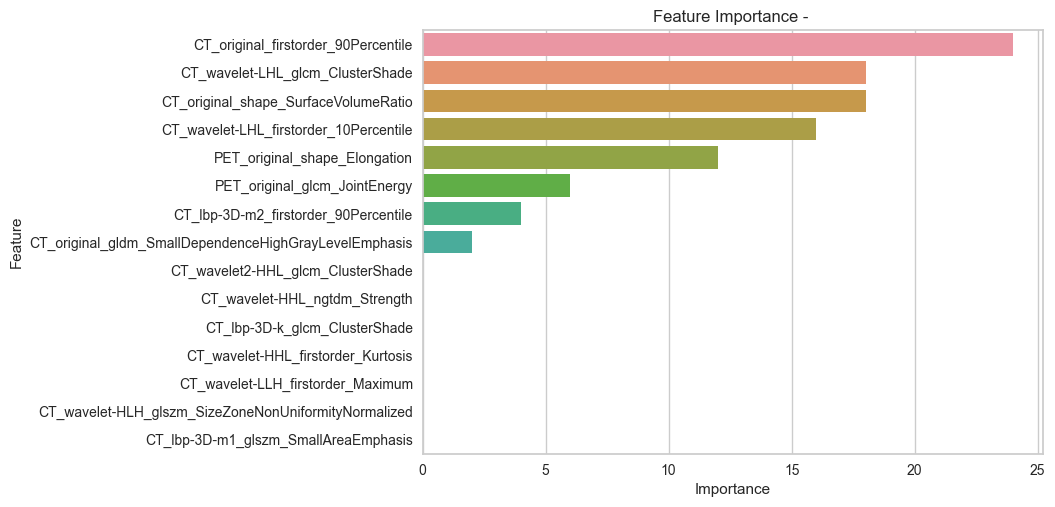

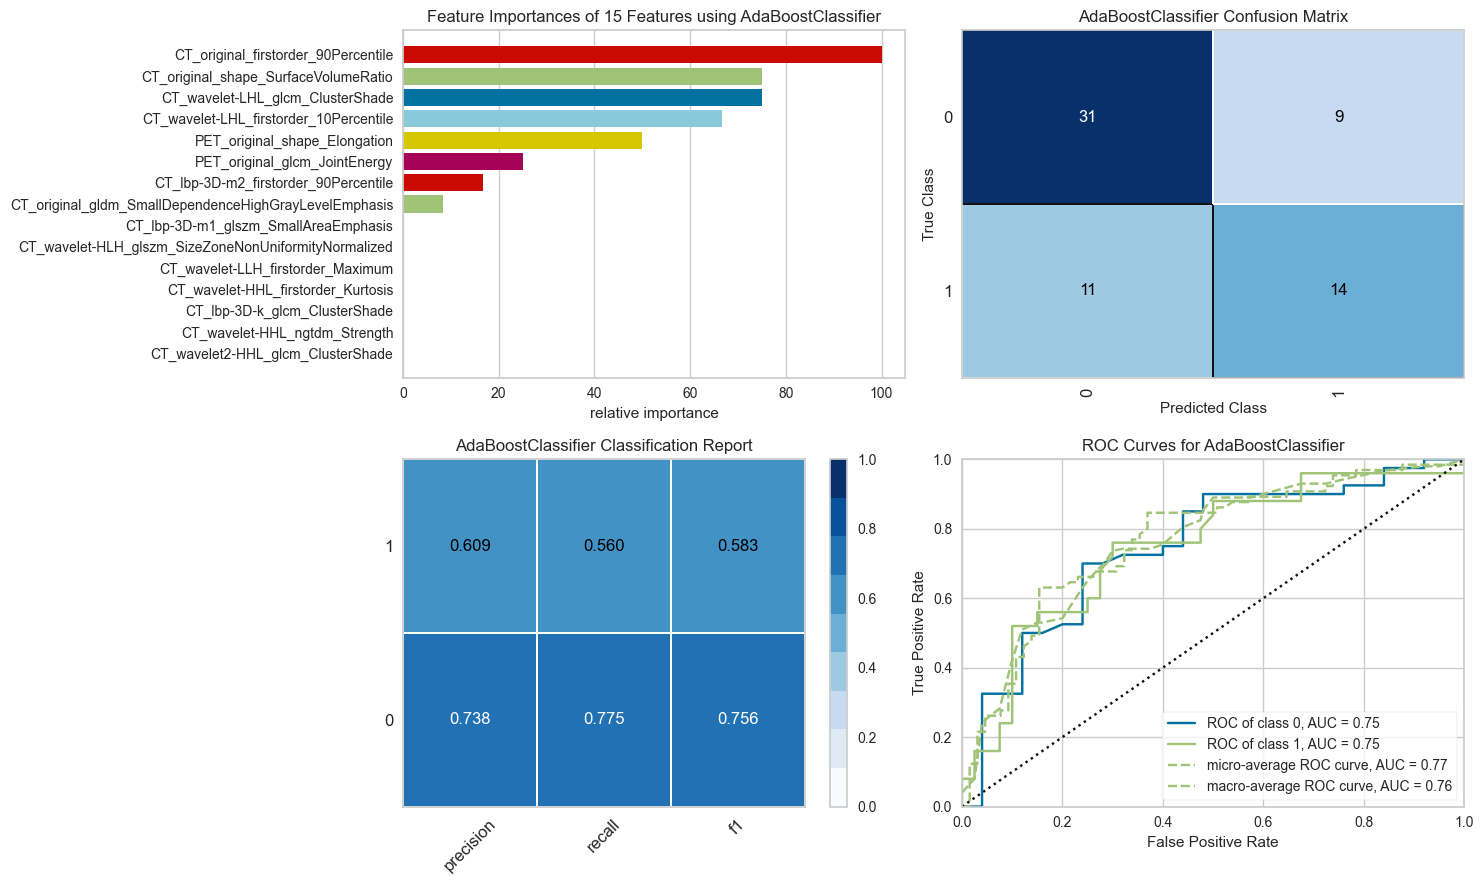

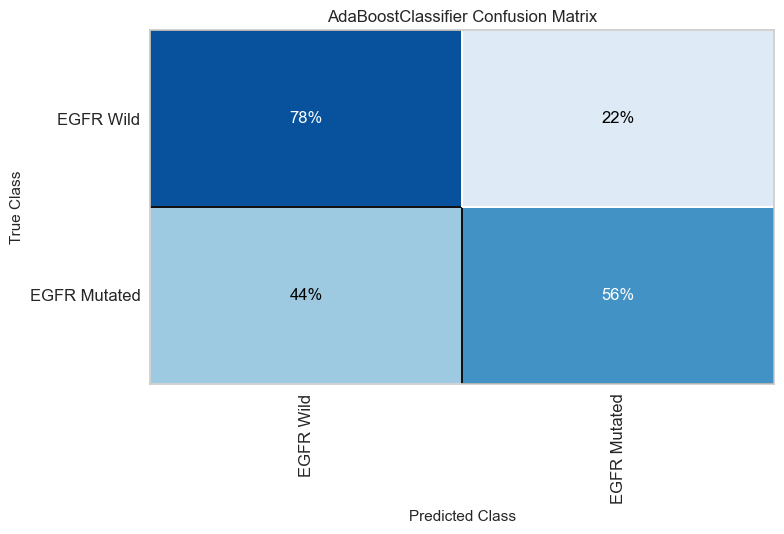

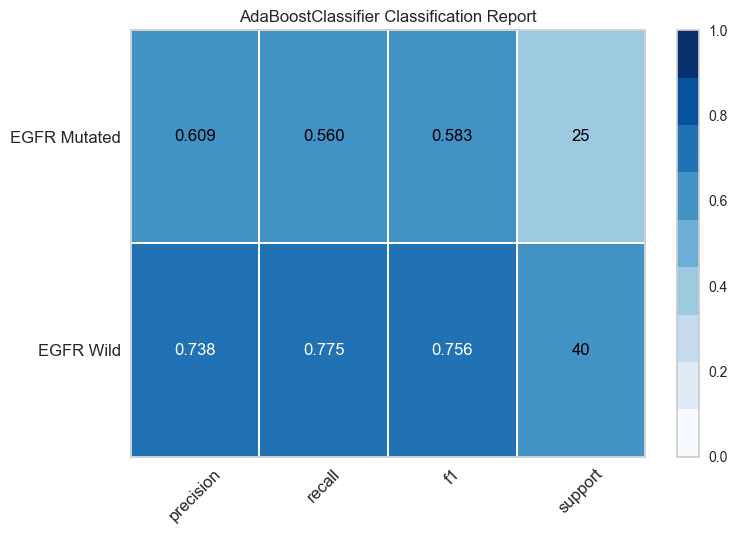

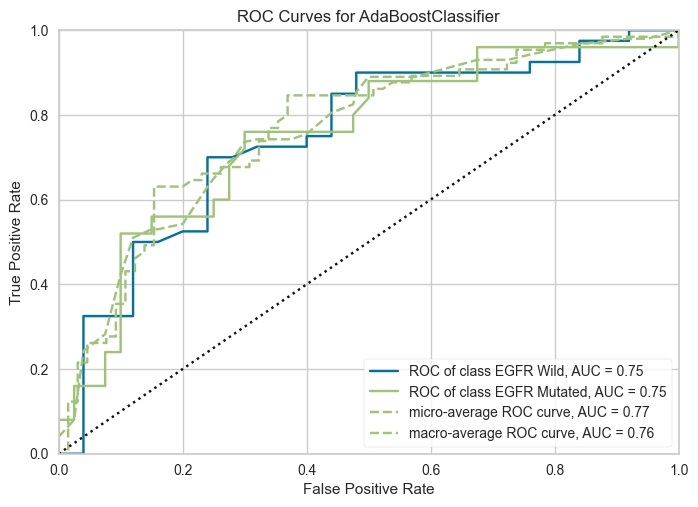

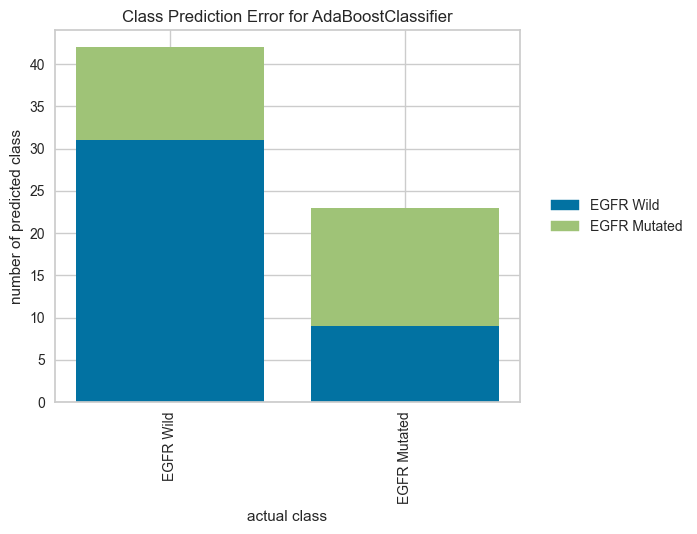

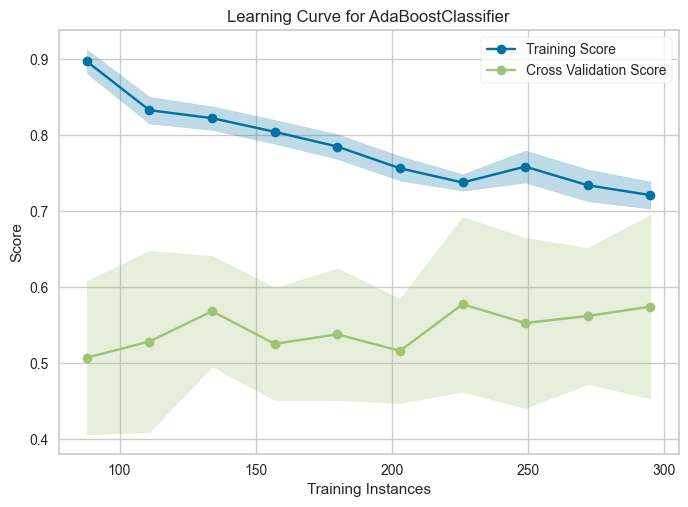

In [45]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)
report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [47]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.7076923076923077

In [48]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB15-gbdt', Save_format = 'csv',Save_type = 'col')

In [49]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB15-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.77      0.75      0.76        40
EGFR Mutated       0.62      0.64      0.63        25

    accuracy                           0.71        65
   macro avg       0.69      0.70      0.69        65
weighted avg       0.71      0.71      0.71        65

precision 0.6153846153846154 accuracy 0.7076923076923077 recall 0.64 auc 0.695


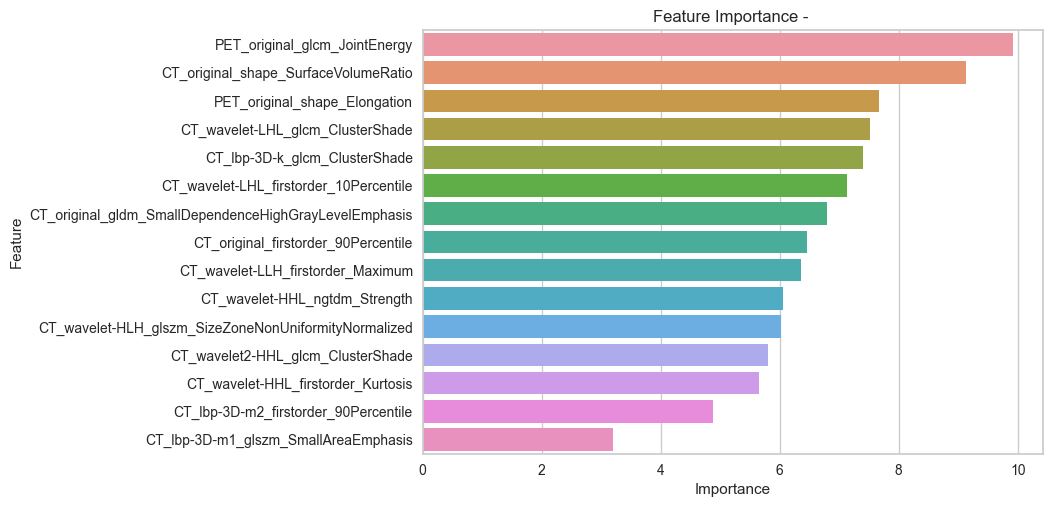

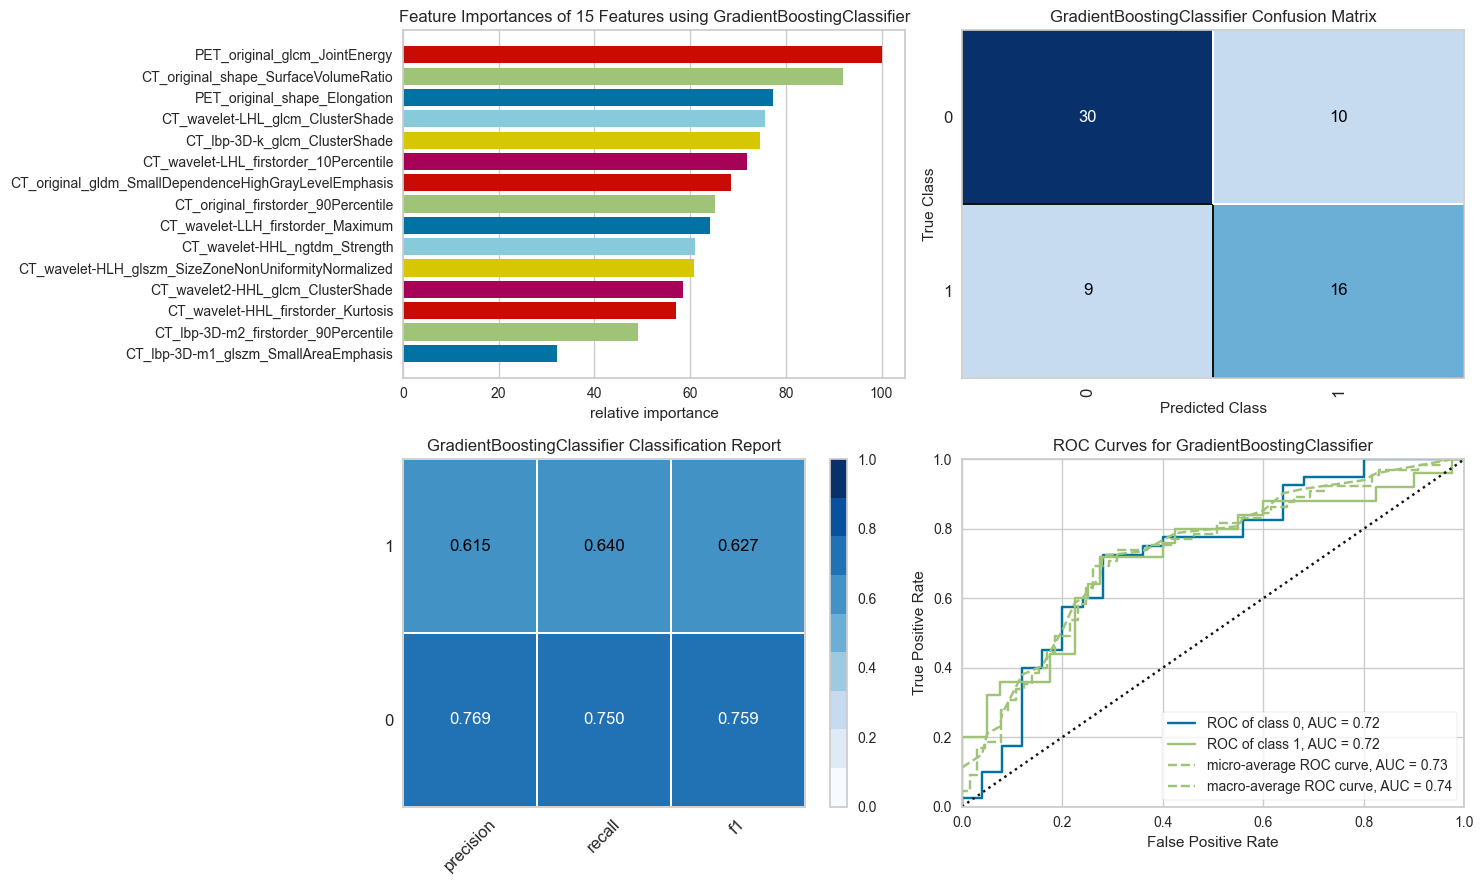

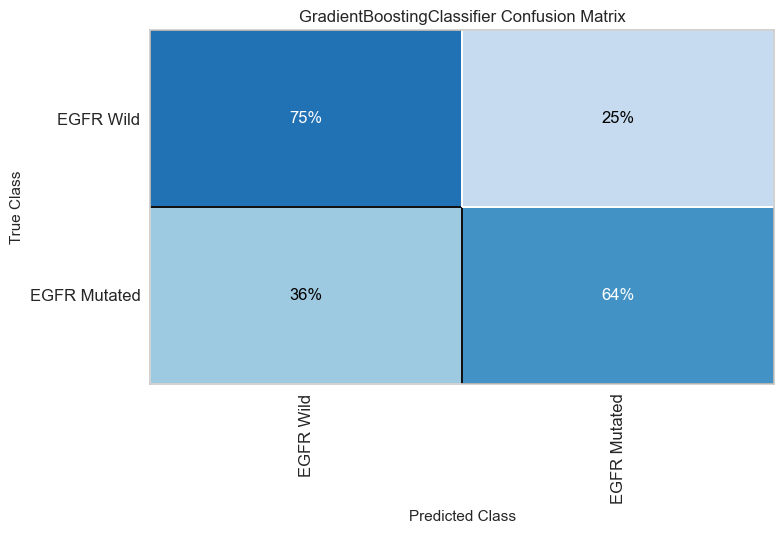

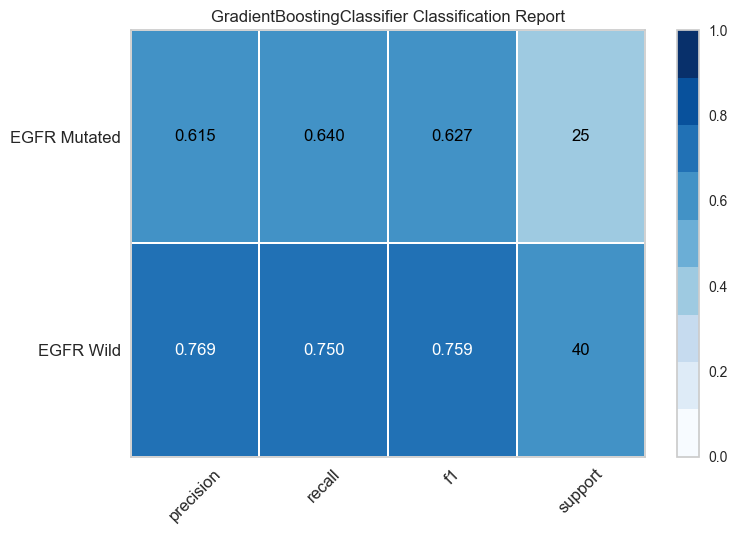

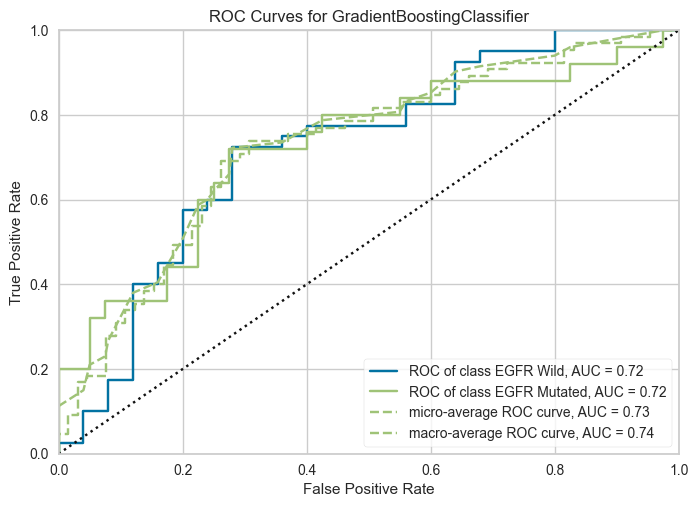

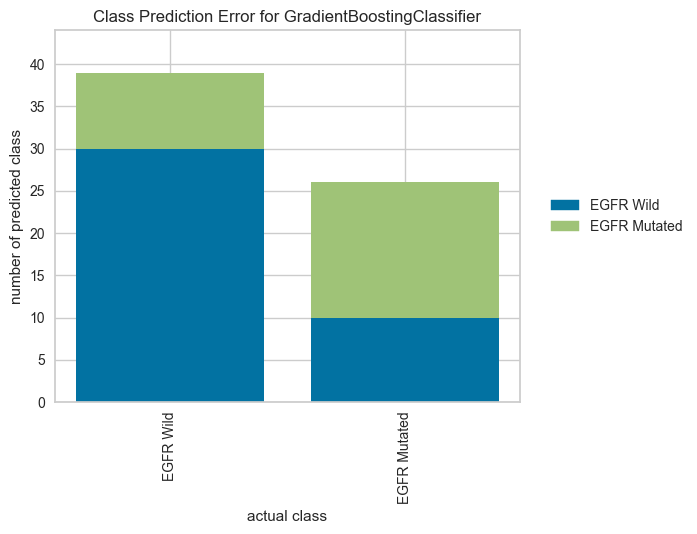

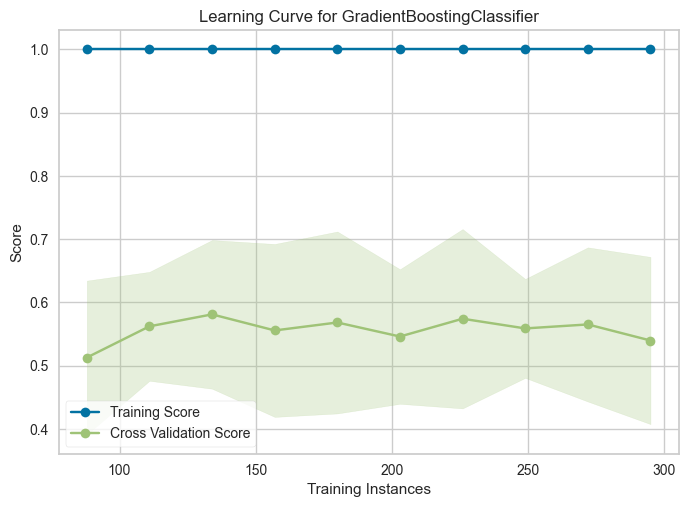

In [50]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [57]:
print(svm_model.best_params_)

{'C': 1, 'degree': 3, 'kernel': 'poly'}


In [58]:
# Final Model
svm_tuned = svm.SVC(**svm_model.best_params_).fit(X_train, y_train)
y_pred = svm_tuned.predict(X_test)
ACC = accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score = roc_auc_score(y_test, y_pred)

print(ACC,roc_auc_score)

0.6461538461538462 0.5775


In [59]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB15-SVM73', Save_format = 'csv',Save_type = 'col')

In [60]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB15-SVM73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.66      0.88      0.75        40
EGFR Mutated       0.58      0.28      0.38        25

    accuracy                           0.65        65
   macro avg       0.62      0.58      0.57        65
weighted avg       0.63      0.65      0.61        65

precision 0.5833333333333334 accuracy 0.6461538461538462 recall 0.28 auc 0.5775


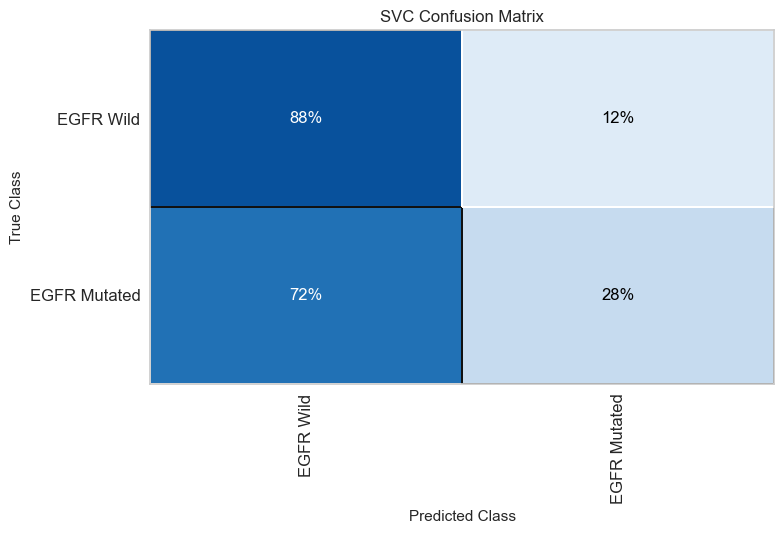

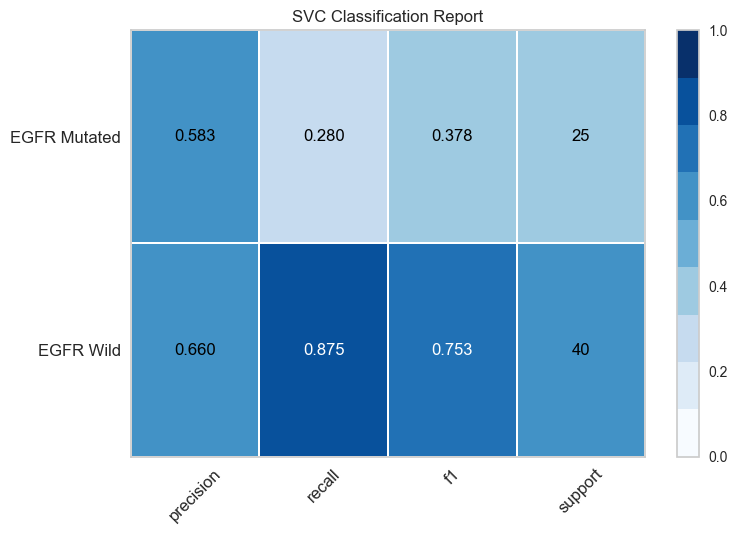

ModelError: no curves will be drawn; set binary=True.

In [61]:
# Visualization of Results --> Feature Importances
# svm_tuned1 = wrap(svm_tuned)
# plot_feature_importances(svm_tuned)
# report_results_quickly(svm_tuned)
plot_results(svm_tuned)
# plot_learning_curve(svm_tuned)

In [64]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6615384615384615

In [65]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB15-XGB73', Save_format = 'csv',Save_type = 'col')

In [66]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB15-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.74      0.70      0.72        40
EGFR Mutated       0.56      0.60      0.58        25

    accuracy                           0.66        65
   macro avg       0.65      0.65      0.65        65
weighted avg       0.67      0.66      0.66        65

precision 0.5555555555555556 accuracy 0.6615384615384615 recall 0.6 auc 0.6499999999999999


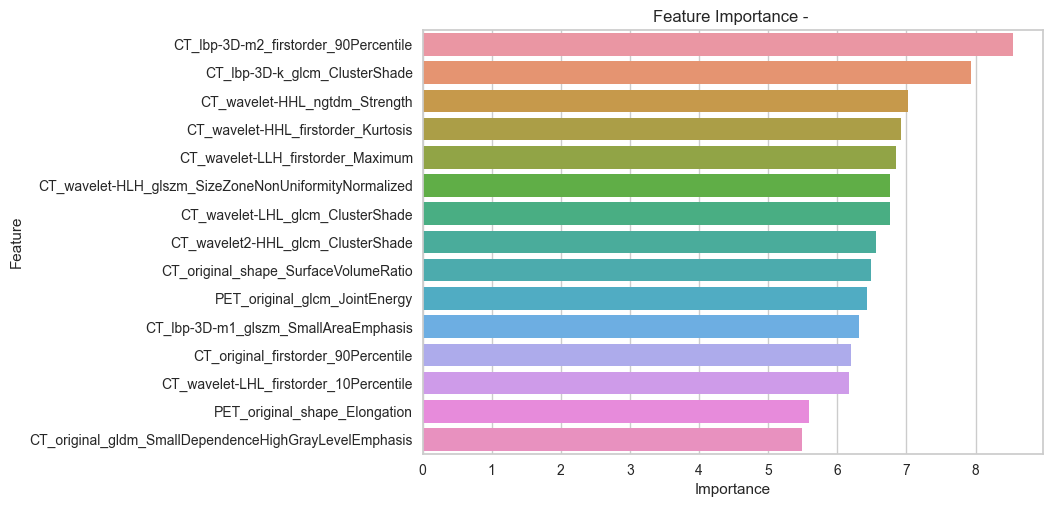

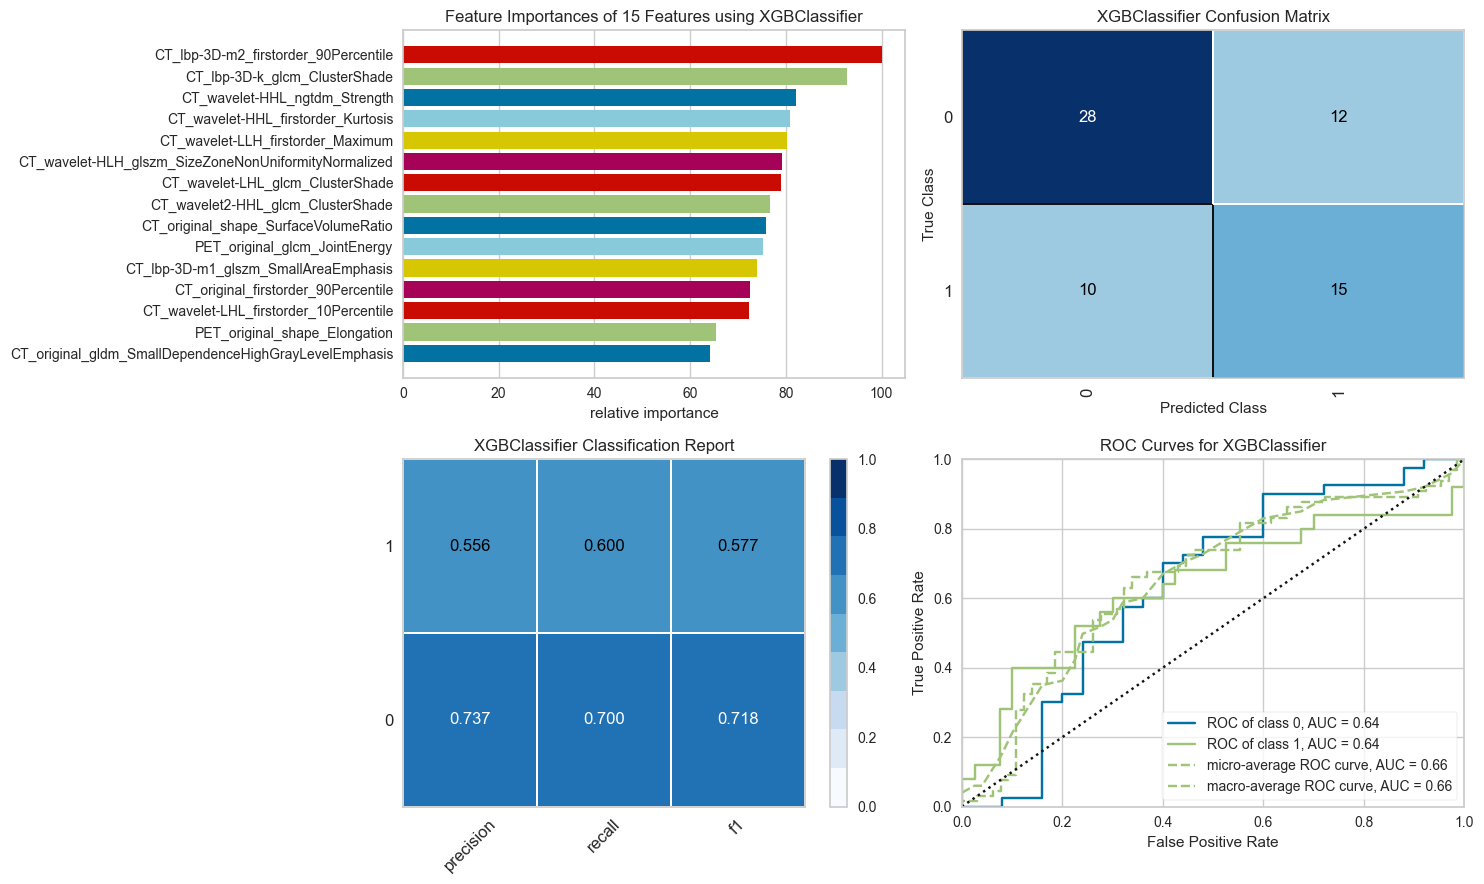

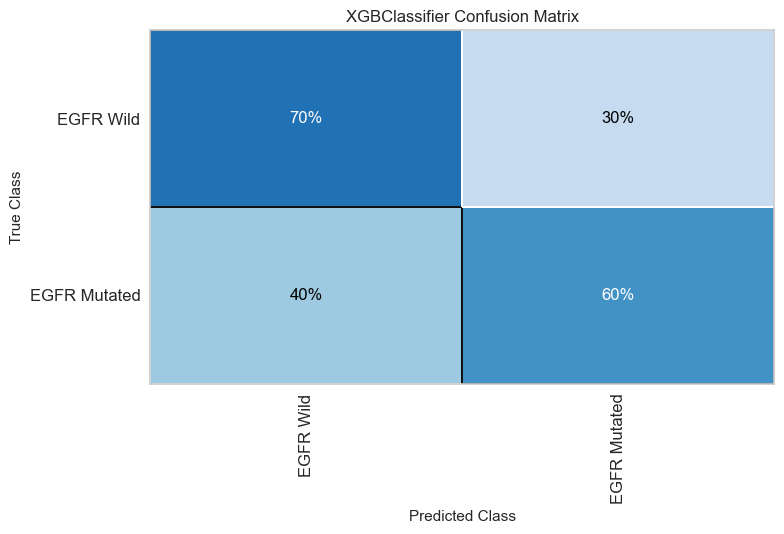

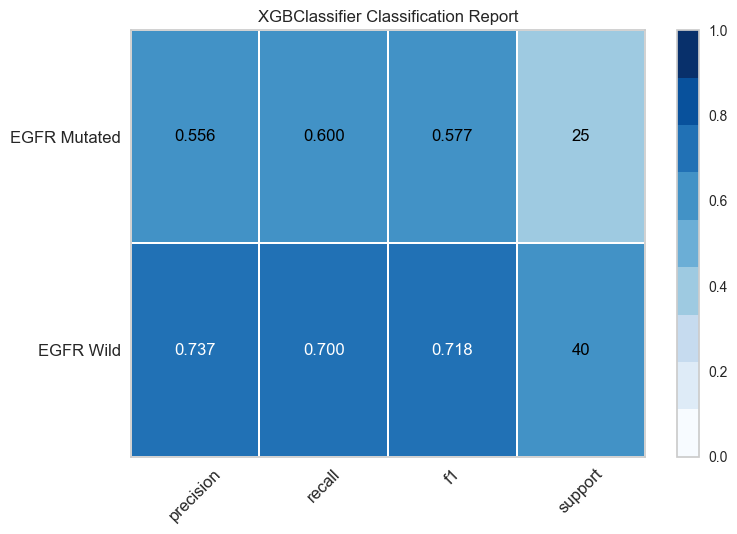

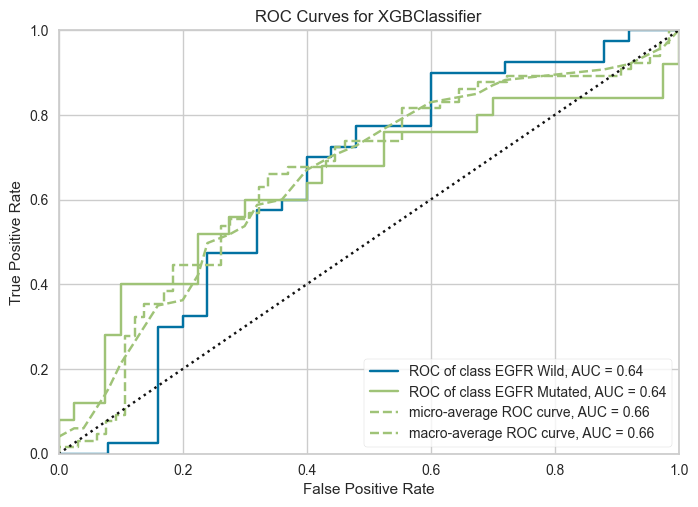

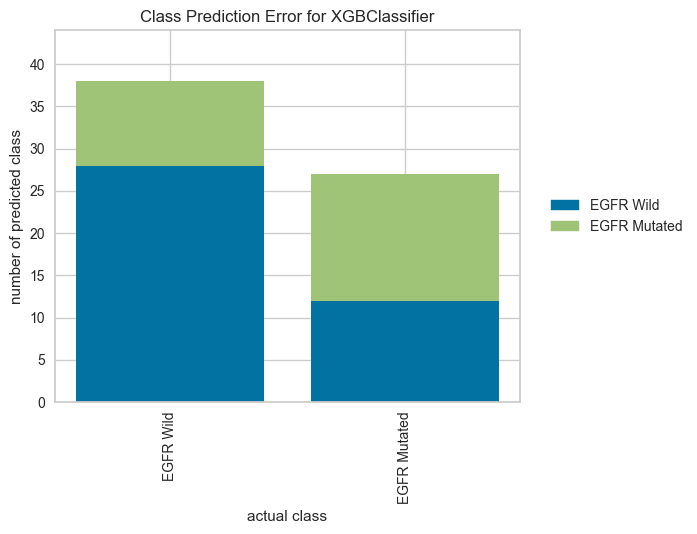

In [67]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [73]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6461538461538462

In [74]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB15-lgb73', Save_format = 'csv',Save_type = 'col')

In [75]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB15-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.77      0.60      0.68        40
EGFR Mutated       0.53      0.72      0.61        25

    accuracy                           0.65        65
   macro avg       0.65      0.66      0.64        65
weighted avg       0.68      0.65      0.65        65

precision 0.5294117647058824 accuracy 0.6461538461538462 recall 0.72 auc 0.66


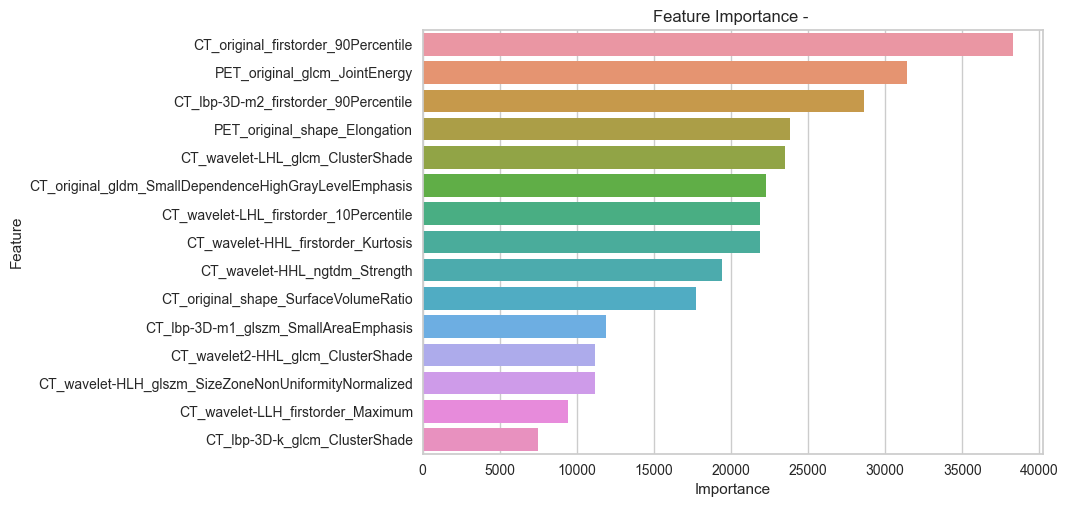

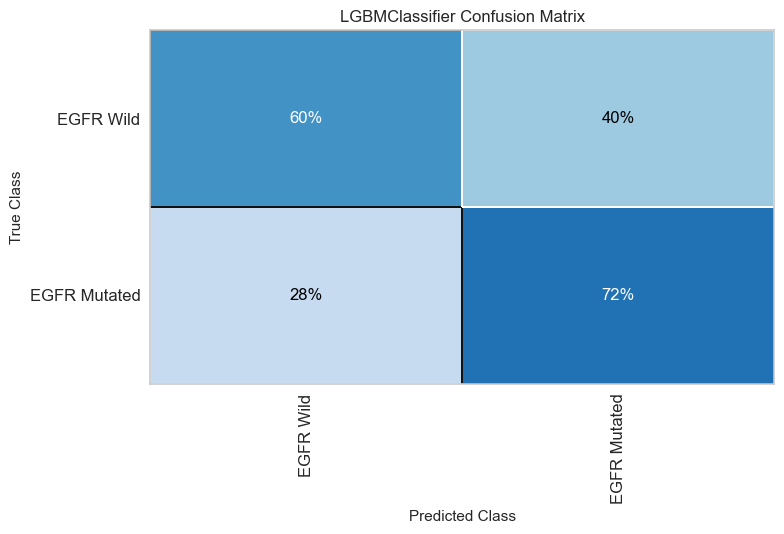

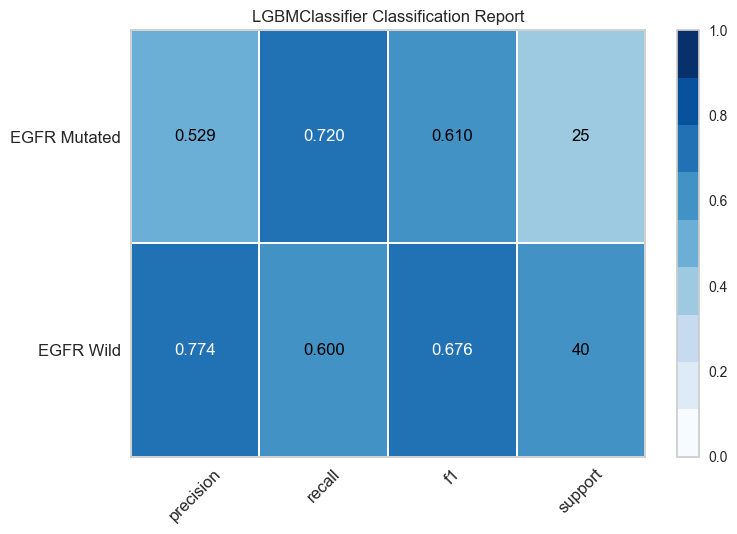

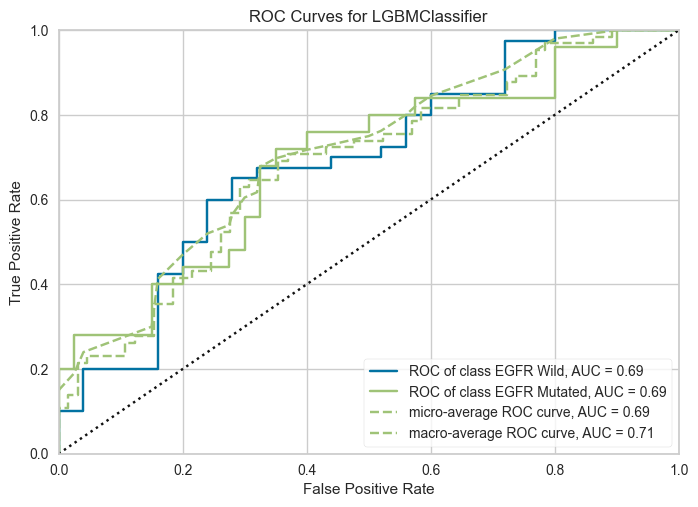

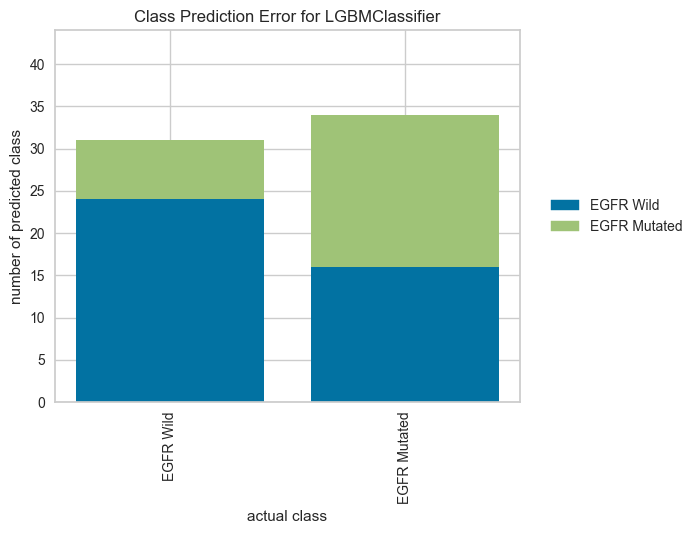

In [76]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

################ Accuracy scores for test set for the models: ################

0:	learn: 0.6594290	total: 6.86ms	remaining: 1.36s
1:	learn: 0.6232533	total: 9.6ms	remaining: 951ms
2:	learn: 0.5937282	total: 11.9ms	remaining: 784ms
3:	learn: 0.5685904	total: 14.4ms	remaining: 705ms
4:	learn: 0.5408406	total: 16.9ms	remaining: 659ms
5:	learn: 0.5166241	total: 19.2ms	remaining: 621ms
6:	learn: 0.4987814	total: 21.7ms	remaining: 598ms
7:	learn: 0.4743194	total: 24.1ms	remaining: 578ms
8:	learn: 0.4582486	total: 26.7ms	remaining: 566ms
9:	learn: 0.4347149	total: 29.2ms	remaining: 554ms
10:	learn: 0.4216608	total: 31.7ms	remaining: 545ms
11:	learn: 0.4078337	total: 34.4ms	remaining: 539ms
12:	learn: 0.3957479	total: 37ms	remaining: 532ms
13:	learn: 0.3792314	total: 39.4ms	remaining: 523ms
14:	learn: 0.3693311	total: 41.7ms	remaining: 515ms
15:	learn: 0.3554575	total: 45.1ms	remaining: 519ms
16:	learn: 0.3440330	total: 47.5ms	remaining: 511ms
17:	learn: 0.3286225	total: 50ms	remaining: 505ms

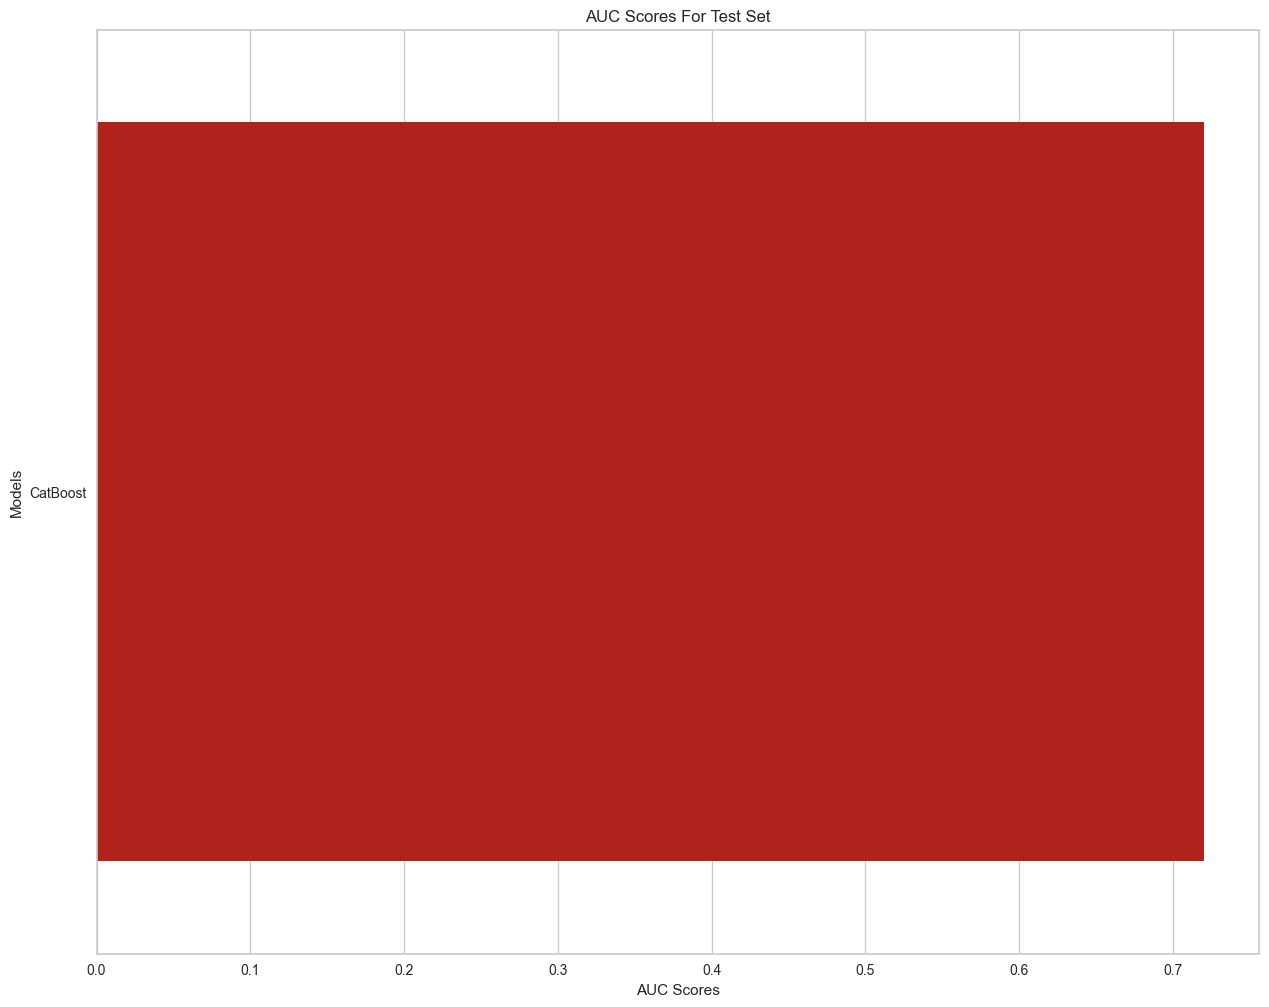

In [34]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [
    ('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
                ('XGBoost', xgb_tuned),
                ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned)
#                 ('SVM', svm_tuned),
                ('GBDT', gbdt_tuned),
#                 ('NGBoost', ngb_tuned),
#                 ('DT', dt_tuned),
                ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

0:	learn: 0.6871877	total: 7.72ms	remaining: 3.85s
1:	learn: 0.6826735	total: 14.5ms	remaining: 3.61s
2:	learn: 0.6773592	total: 22.2ms	remaining: 3.68s
3:	learn: 0.6725461	total: 29.3ms	remaining: 3.64s
4:	learn: 0.6676843	total: 37.6ms	remaining: 3.72s
5:	learn: 0.6629142	total: 44.9ms	remaining: 3.7s
6:	learn: 0.6572753	total: 52.1ms	remaining: 3.67s
7:	learn: 0.6520981	total: 59.7ms	remaining: 3.67s
8:	learn: 0.6466749	total: 67.4ms	remaining: 3.68s
9:	learn: 0.6416100	total: 74ms	remaining: 3.63s
10:	learn: 0.6369578	total: 80.2ms	remaining: 3.57s
11:	learn: 0.6318964	total: 87.7ms	remaining: 3.57s
12:	learn: 0.6273714	total: 94ms	remaining: 3.52s
13:	learn: 0.6225886	total: 100ms	remaining: 3.48s
14:	learn: 0.6173780	total: 106ms	remaining: 3.44s
15:	learn: 0.6126808	total: 113ms	remaining: 3.41s
16:	learn: 0.6089975	total: 119ms	remaining: 3.37s
17:	learn: 0.6047588	total: 125ms	remaining: 3.35s
18:	learn: 0.6011521	total: 132ms	remaining: 3.34s
19:	learn: 0.5964440	total: 138ms

162:	learn: 0.2573255	total: 1.1s	remaining: 2.27s
163:	learn: 0.2559632	total: 1.1s	remaining: 2.26s
164:	learn: 0.2549437	total: 1.11s	remaining: 2.25s
165:	learn: 0.2535648	total: 1.12s	remaining: 2.25s
166:	learn: 0.2521962	total: 1.13s	remaining: 2.25s
167:	learn: 0.2509559	total: 1.13s	remaining: 2.24s
168:	learn: 0.2496855	total: 1.14s	remaining: 2.23s
169:	learn: 0.2480307	total: 1.15s	remaining: 2.23s
170:	learn: 0.2468902	total: 1.15s	remaining: 2.22s
171:	learn: 0.2458392	total: 1.16s	remaining: 2.21s
172:	learn: 0.2446044	total: 1.17s	remaining: 2.21s
173:	learn: 0.2435622	total: 1.17s	remaining: 2.2s
174:	learn: 0.2424400	total: 1.18s	remaining: 2.19s
175:	learn: 0.2413567	total: 1.19s	remaining: 2.19s
176:	learn: 0.2404680	total: 1.19s	remaining: 2.18s
177:	learn: 0.2394731	total: 1.2s	remaining: 2.17s
178:	learn: 0.2381918	total: 1.21s	remaining: 2.17s
179:	learn: 0.2370135	total: 1.22s	remaining: 2.16s
180:	learn: 0.2359353	total: 1.22s	remaining: 2.15s
181:	learn: 0.23

341:	learn: 0.1260695	total: 2.37s	remaining: 1.1s
342:	learn: 0.1256771	total: 2.38s	remaining: 1.09s
343:	learn: 0.1251978	total: 2.39s	remaining: 1.08s
344:	learn: 0.1247751	total: 2.4s	remaining: 1.08s
345:	learn: 0.1243235	total: 2.41s	remaining: 1.07s
346:	learn: 0.1239936	total: 2.41s	remaining: 1.06s
347:	learn: 0.1236268	total: 2.42s	remaining: 1.06s
348:	learn: 0.1231926	total: 2.43s	remaining: 1.05s
349:	learn: 0.1227699	total: 2.44s	remaining: 1.04s
350:	learn: 0.1222722	total: 2.44s	remaining: 1.04s
351:	learn: 0.1218248	total: 2.45s	remaining: 1.03s
352:	learn: 0.1214100	total: 2.46s	remaining: 1.02s
353:	learn: 0.1210281	total: 2.47s	remaining: 1.02s
354:	learn: 0.1207721	total: 2.47s	remaining: 1.01s
355:	learn: 0.1203527	total: 2.47s	remaining: 1s
356:	learn: 0.1199559	total: 2.48s	remaining: 994ms
357:	learn: 0.1195268	total: 2.49s	remaining: 987ms
358:	learn: 0.1191484	total: 2.49s	remaining: 980ms
359:	learn: 0.1188522	total: 2.5s	remaining: 973ms
360:	learn: 0.1184

1:	learn: 0.6824076	total: 17.6ms	remaining: 4.38s
2:	learn: 0.6769737	total: 25.5ms	remaining: 4.23s
3:	learn: 0.6721079	total: 33.4ms	remaining: 4.14s
4:	learn: 0.6663801	total: 42.2ms	remaining: 4.18s
5:	learn: 0.6616137	total: 50.3ms	remaining: 4.14s
6:	learn: 0.6563060	total: 57.3ms	remaining: 4.04s
7:	learn: 0.6511105	total: 64.6ms	remaining: 3.97s
8:	learn: 0.6471980	total: 71.7ms	remaining: 3.91s
9:	learn: 0.6430190	total: 78.9ms	remaining: 3.87s
10:	learn: 0.6388137	total: 85.9ms	remaining: 3.82s
11:	learn: 0.6334693	total: 92.7ms	remaining: 3.77s
12:	learn: 0.6291876	total: 99.4ms	remaining: 3.72s
13:	learn: 0.6242506	total: 106ms	remaining: 3.69s
14:	learn: 0.6198271	total: 113ms	remaining: 3.65s
15:	learn: 0.6170966	total: 120ms	remaining: 3.62s
16:	learn: 0.6128515	total: 127ms	remaining: 3.6s
17:	learn: 0.6086912	total: 133ms	remaining: 3.57s
18:	learn: 0.6045531	total: 140ms	remaining: 3.54s
19:	learn: 0.5994811	total: 147ms	remaining: 3.53s
20:	learn: 0.5949950	total: 1

161:	learn: 0.2693239	total: 1.13s	remaining: 2.35s
162:	learn: 0.2680815	total: 1.13s	remaining: 2.34s
163:	learn: 0.2667918	total: 1.14s	remaining: 2.34s
164:	learn: 0.2661993	total: 1.14s	remaining: 2.32s
165:	learn: 0.2649377	total: 1.15s	remaining: 2.31s
166:	learn: 0.2637362	total: 1.16s	remaining: 2.31s
167:	learn: 0.2625550	total: 1.16s	remaining: 2.3s
168:	learn: 0.2612349	total: 1.17s	remaining: 2.29s
169:	learn: 0.2601626	total: 1.18s	remaining: 2.29s
170:	learn: 0.2589410	total: 1.19s	remaining: 2.28s
171:	learn: 0.2575778	total: 1.19s	remaining: 2.27s
172:	learn: 0.2567159	total: 1.2s	remaining: 2.27s
173:	learn: 0.2554649	total: 1.21s	remaining: 2.26s
174:	learn: 0.2543335	total: 1.21s	remaining: 2.25s
175:	learn: 0.2530662	total: 1.22s	remaining: 2.24s
176:	learn: 0.2518225	total: 1.23s	remaining: 2.24s
177:	learn: 0.2508036	total: 1.23s	remaining: 2.23s
178:	learn: 0.2496481	total: 1.24s	remaining: 2.22s
179:	learn: 0.2482689	total: 1.25s	remaining: 2.21s
180:	learn: 0.

322:	learn: 0.1433568	total: 2.23s	remaining: 1.22s
323:	learn: 0.1429118	total: 2.24s	remaining: 1.22s
324:	learn: 0.1424013	total: 2.25s	remaining: 1.21s
325:	learn: 0.1420296	total: 2.25s	remaining: 1.2s
326:	learn: 0.1415819	total: 2.26s	remaining: 1.2s
327:	learn: 0.1410208	total: 2.27s	remaining: 1.19s
328:	learn: 0.1405077	total: 2.28s	remaining: 1.18s
329:	learn: 0.1400162	total: 2.28s	remaining: 1.18s
330:	learn: 0.1395052	total: 2.29s	remaining: 1.17s
331:	learn: 0.1390575	total: 2.3s	remaining: 1.16s
332:	learn: 0.1386694	total: 2.3s	remaining: 1.15s
333:	learn: 0.1382561	total: 2.31s	remaining: 1.15s
334:	learn: 0.1377908	total: 2.31s	remaining: 1.14s
335:	learn: 0.1374034	total: 2.32s	remaining: 1.13s
336:	learn: 0.1369250	total: 2.33s	remaining: 1.13s
337:	learn: 0.1364007	total: 2.34s	remaining: 1.12s
338:	learn: 0.1359706	total: 2.34s	remaining: 1.11s
339:	learn: 0.1355506	total: 2.35s	remaining: 1.1s
340:	learn: 0.1352109	total: 2.36s	remaining: 1.1s
341:	learn: 0.1347

484:	learn: 0.0895477	total: 3.33s	remaining: 103ms
485:	learn: 0.0893597	total: 3.33s	remaining: 96ms
486:	learn: 0.0891454	total: 3.34s	remaining: 89.2ms
487:	learn: 0.0889052	total: 3.35s	remaining: 82.3ms
488:	learn: 0.0886919	total: 3.35s	remaining: 75.5ms
489:	learn: 0.0884683	total: 3.36s	remaining: 68.6ms
490:	learn: 0.0882477	total: 3.37s	remaining: 61.7ms
491:	learn: 0.0880191	total: 3.38s	remaining: 54.9ms
492:	learn: 0.0877748	total: 3.38s	remaining: 48ms
493:	learn: 0.0875631	total: 3.39s	remaining: 41.2ms
494:	learn: 0.0873439	total: 3.4s	remaining: 34.3ms
495:	learn: 0.0871449	total: 3.4s	remaining: 27.4ms
496:	learn: 0.0868664	total: 3.41s	remaining: 20.6ms
497:	learn: 0.0866543	total: 3.42s	remaining: 13.7ms
498:	learn: 0.0864524	total: 3.42s	remaining: 6.86ms
499:	learn: 0.0862344	total: 3.43s	remaining: 0us
[iter 0] loss=0.6802 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.2124 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 200] loss=0.2124 val_loss=0.00

26:	learn: 0.5796646	total: 419ms	remaining: 7.34s
27:	learn: 0.5756227	total: 435ms	remaining: 7.33s
28:	learn: 0.5721491	total: 450ms	remaining: 7.32s
29:	learn: 0.5682207	total: 466ms	remaining: 7.3s
30:	learn: 0.5647552	total: 480ms	remaining: 7.26s
31:	learn: 0.5627921	total: 494ms	remaining: 7.22s
32:	learn: 0.5589744	total: 508ms	remaining: 7.19s
33:	learn: 0.5565845	total: 522ms	remaining: 7.15s
34:	learn: 0.5535872	total: 535ms	remaining: 7.11s
35:	learn: 0.5504536	total: 549ms	remaining: 7.08s
36:	learn: 0.5477280	total: 564ms	remaining: 7.05s
37:	learn: 0.5443292	total: 578ms	remaining: 7.03s
38:	learn: 0.5422829	total: 592ms	remaining: 7s
39:	learn: 0.5386346	total: 609ms	remaining: 7s
40:	learn: 0.5350566	total: 624ms	remaining: 6.99s
41:	learn: 0.5322217	total: 640ms	remaining: 6.97s
42:	learn: 0.5290374	total: 654ms	remaining: 6.95s
43:	learn: 0.5256595	total: 668ms	remaining: 6.92s
44:	learn: 0.5223751	total: 682ms	remaining: 6.9s
45:	learn: 0.5196386	total: 696ms	remai

192:	learn: 0.2550568	total: 2.82s	remaining: 4.49s
193:	learn: 0.2540385	total: 2.84s	remaining: 4.48s
194:	learn: 0.2530277	total: 2.85s	remaining: 4.46s
195:	learn: 0.2520322	total: 2.87s	remaining: 4.45s
196:	learn: 0.2509070	total: 2.88s	remaining: 4.43s
197:	learn: 0.2499487	total: 2.89s	remaining: 4.42s
198:	learn: 0.2490621	total: 2.91s	remaining: 4.4s
199:	learn: 0.2480534	total: 2.92s	remaining: 4.38s
200:	learn: 0.2467893	total: 2.94s	remaining: 4.37s
201:	learn: 0.2459209	total: 2.95s	remaining: 4.35s
202:	learn: 0.2448918	total: 2.96s	remaining: 4.34s
203:	learn: 0.2441322	total: 2.98s	remaining: 4.32s
204:	learn: 0.2430634	total: 2.99s	remaining: 4.31s
205:	learn: 0.2419509	total: 3.01s	remaining: 4.29s
206:	learn: 0.2409590	total: 3.02s	remaining: 4.28s
207:	learn: 0.2400918	total: 3.04s	remaining: 4.26s
208:	learn: 0.2389609	total: 3.05s	remaining: 4.25s
209:	learn: 0.2380262	total: 3.07s	remaining: 4.24s
210:	learn: 0.2371743	total: 3.08s	remaining: 4.22s
211:	learn: 0

359:	learn: 0.1444286	total: 5.21s	remaining: 2.02s
360:	learn: 0.1440382	total: 5.22s	remaining: 2.01s
361:	learn: 0.1437558	total: 5.24s	remaining: 2s
362:	learn: 0.1433954	total: 5.25s	remaining: 1.98s
363:	learn: 0.1428269	total: 5.27s	remaining: 1.97s
364:	learn: 0.1424574	total: 5.28s	remaining: 1.95s
365:	learn: 0.1420457	total: 5.29s	remaining: 1.94s
366:	learn: 0.1415985	total: 5.31s	remaining: 1.92s
367:	learn: 0.1410265	total: 5.32s	remaining: 1.91s
368:	learn: 0.1406287	total: 5.33s	remaining: 1.89s
369:	learn: 0.1402551	total: 5.35s	remaining: 1.88s
370:	learn: 0.1398820	total: 5.36s	remaining: 1.86s
371:	learn: 0.1394220	total: 5.38s	remaining: 1.85s
372:	learn: 0.1389613	total: 5.39s	remaining: 1.83s
373:	learn: 0.1386279	total: 5.41s	remaining: 1.82s
374:	learn: 0.1383044	total: 5.43s	remaining: 1.81s
375:	learn: 0.1378497	total: 5.44s	remaining: 1.79s
376:	learn: 0.1374436	total: 5.46s	remaining: 1.78s
377:	learn: 0.1369367	total: 5.47s	remaining: 1.77s
378:	learn: 0.1

[iter 1500] loss=0.1602 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1600] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1700] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1800] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1900] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2000] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2100] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2200] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2300] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2400] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2500] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2600] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2700] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2800] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2900] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 3000] loss=0.1591 v

139:	learn: 0.2942584	total: 923ms	remaining: 2.37s
140:	learn: 0.2930900	total: 930ms	remaining: 2.37s
141:	learn: 0.2916020	total: 938ms	remaining: 2.37s
142:	learn: 0.2898504	total: 946ms	remaining: 2.36s
143:	learn: 0.2886551	total: 954ms	remaining: 2.36s
144:	learn: 0.2870855	total: 962ms	remaining: 2.36s
145:	learn: 0.2855642	total: 970ms	remaining: 2.35s
146:	learn: 0.2838378	total: 977ms	remaining: 2.35s
147:	learn: 0.2821928	total: 984ms	remaining: 2.34s
148:	learn: 0.2806816	total: 990ms	remaining: 2.33s
149:	learn: 0.2793649	total: 997ms	remaining: 2.33s
150:	learn: 0.2779313	total: 1s	remaining: 2.32s
151:	learn: 0.2765063	total: 1.01s	remaining: 2.31s
152:	learn: 0.2750852	total: 1.01s	remaining: 2.3s
153:	learn: 0.2737255	total: 1.02s	remaining: 2.29s
154:	learn: 0.2724135	total: 1.03s	remaining: 2.29s
155:	learn: 0.2711916	total: 1.03s	remaining: 2.27s
156:	learn: 0.2698724	total: 1.04s	remaining: 2.26s
157:	learn: 0.2685842	total: 1.04s	remaining: 2.26s
158:	learn: 0.26

305:	learn: 0.1457708	total: 2.01s	remaining: 1.28s
306:	learn: 0.1453238	total: 2.02s	remaining: 1.27s
307:	learn: 0.1448445	total: 2.03s	remaining: 1.27s
308:	learn: 0.1442920	total: 2.04s	remaining: 1.26s
309:	learn: 0.1437619	total: 2.05s	remaining: 1.26s
310:	learn: 0.1432814	total: 2.06s	remaining: 1.25s
311:	learn: 0.1427756	total: 2.06s	remaining: 1.24s
312:	learn: 0.1423356	total: 2.07s	remaining: 1.24s
313:	learn: 0.1418126	total: 2.08s	remaining: 1.23s
314:	learn: 0.1413981	total: 2.09s	remaining: 1.23s
315:	learn: 0.1409152	total: 2.1s	remaining: 1.22s
316:	learn: 0.1403885	total: 2.1s	remaining: 1.21s
317:	learn: 0.1399133	total: 2.11s	remaining: 1.21s
318:	learn: 0.1394290	total: 2.12s	remaining: 1.2s
319:	learn: 0.1389734	total: 2.13s	remaining: 1.2s
320:	learn: 0.1385552	total: 2.13s	remaining: 1.19s
321:	learn: 0.1381426	total: 2.14s	remaining: 1.18s
322:	learn: 0.1377092	total: 2.15s	remaining: 1.18s
323:	learn: 0.1371690	total: 2.15s	remaining: 1.17s
324:	learn: 0.13

488:	learn: 0.0836531	total: 3.29s	remaining: 74.1ms
489:	learn: 0.0834175	total: 3.3s	remaining: 67.3ms
490:	learn: 0.0831729	total: 3.31s	remaining: 60.6ms
491:	learn: 0.0830032	total: 3.31s	remaining: 53.9ms
492:	learn: 0.0828082	total: 3.32s	remaining: 47.1ms
493:	learn: 0.0825429	total: 3.33s	remaining: 40.4ms
494:	learn: 0.0822723	total: 3.33s	remaining: 33.7ms
495:	learn: 0.0820950	total: 3.34s	remaining: 26.9ms
496:	learn: 0.0818476	total: 3.35s	remaining: 20.2ms
497:	learn: 0.0816519	total: 3.35s	remaining: 13.5ms
498:	learn: 0.0814580	total: 3.36s	remaining: 6.73ms
499:	learn: 0.0812509	total: 3.37s	remaining: 0us
0:	learn: 0.6874801	total: 9.21ms	remaining: 4.59s
1:	learn: 0.6822154	total: 17.8ms	remaining: 4.43s
2:	learn: 0.6761607	total: 26.2ms	remaining: 4.34s
3:	learn: 0.6703971	total: 34.6ms	remaining: 4.29s
4:	learn: 0.6633025	total: 42.5ms	remaining: 4.21s
5:	learn: 0.6584339	total: 51.1ms	remaining: 4.21s
6:	learn: 0.6531831	total: 59.1ms	remaining: 4.16s
7:	learn: 0

154:	learn: 0.2482470	total: 1.13s	remaining: 2.52s
155:	learn: 0.2471701	total: 1.14s	remaining: 2.51s
156:	learn: 0.2457453	total: 1.15s	remaining: 2.51s
157:	learn: 0.2443737	total: 1.15s	remaining: 2.5s
158:	learn: 0.2429456	total: 1.16s	remaining: 2.49s
159:	learn: 0.2417424	total: 1.17s	remaining: 2.48s
160:	learn: 0.2405364	total: 1.18s	remaining: 2.48s
161:	learn: 0.2393640	total: 1.18s	remaining: 2.47s
162:	learn: 0.2382969	total: 1.19s	remaining: 2.46s
163:	learn: 0.2369656	total: 1.2s	remaining: 2.45s
164:	learn: 0.2356820	total: 1.2s	remaining: 2.44s
165:	learn: 0.2346298	total: 1.21s	remaining: 2.44s
166:	learn: 0.2334939	total: 1.22s	remaining: 2.43s
167:	learn: 0.2320067	total: 1.23s	remaining: 2.42s
168:	learn: 0.2308336	total: 1.23s	remaining: 2.41s
169:	learn: 0.2297445	total: 1.24s	remaining: 2.41s
170:	learn: 0.2285270	total: 1.25s	remaining: 2.4s
171:	learn: 0.2274443	total: 1.25s	remaining: 2.39s
172:	learn: 0.2264137	total: 1.26s	remaining: 2.38s
173:	learn: 0.22

334:	learn: 0.1185525	total: 2.4s	remaining: 1.18s
335:	learn: 0.1180834	total: 2.41s	remaining: 1.18s
336:	learn: 0.1176596	total: 2.42s	remaining: 1.17s
337:	learn: 0.1172522	total: 2.42s	remaining: 1.16s
338:	learn: 0.1168159	total: 2.43s	remaining: 1.16s
339:	learn: 0.1164701	total: 2.44s	remaining: 1.15s
340:	learn: 0.1160240	total: 2.45s	remaining: 1.14s
341:	learn: 0.1156714	total: 2.45s	remaining: 1.13s
342:	learn: 0.1152084	total: 2.46s	remaining: 1.13s
343:	learn: 0.1148010	total: 2.47s	remaining: 1.12s
344:	learn: 0.1144395	total: 2.47s	remaining: 1.11s
345:	learn: 0.1140180	total: 2.48s	remaining: 1.1s
346:	learn: 0.1136581	total: 2.49s	remaining: 1.1s
347:	learn: 0.1131681	total: 2.49s	remaining: 1.09s
348:	learn: 0.1127702	total: 2.5s	remaining: 1.08s
349:	learn: 0.1123734	total: 2.51s	remaining: 1.07s
350:	learn: 0.1120007	total: 2.52s	remaining: 1.07s
351:	learn: 0.1115936	total: 2.52s	remaining: 1.06s
352:	learn: 0.1112320	total: 2.53s	remaining: 1.05s
353:	learn: 0.11

[iter 0] loss=0.6802 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.1070 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.1070 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.1042 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 400] loss=0.1042 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 500] loss=0.1042 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 600] loss=0.1042 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 700] loss=0.1042 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 800] loss=0.1042 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 900] loss=0.1042 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1000] loss=0.1042 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1100] loss=0.1042 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1200] loss=0.1042 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1300] loss=0.1042 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1400] loss=0.1042 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1500] loss=0.1042 val_loss=0.00

41:	learn: 0.5322217	total: 637ms	remaining: 6.94s
42:	learn: 0.5290374	total: 652ms	remaining: 6.93s
43:	learn: 0.5256595	total: 666ms	remaining: 6.91s
44:	learn: 0.5223751	total: 681ms	remaining: 6.88s
45:	learn: 0.5196386	total: 695ms	remaining: 6.86s
46:	learn: 0.5161892	total: 711ms	remaining: 6.85s
47:	learn: 0.5136334	total: 725ms	remaining: 6.82s
48:	learn: 0.5101296	total: 739ms	remaining: 6.8s
49:	learn: 0.5073873	total: 753ms	remaining: 6.78s
50:	learn: 0.5045214	total: 768ms	remaining: 6.76s
51:	learn: 0.5012193	total: 782ms	remaining: 6.74s
52:	learn: 0.4981332	total: 796ms	remaining: 6.71s
53:	learn: 0.4945575	total: 811ms	remaining: 6.7s
54:	learn: 0.4917611	total: 827ms	remaining: 6.69s
55:	learn: 0.4887808	total: 842ms	remaining: 6.68s
56:	learn: 0.4856088	total: 857ms	remaining: 6.66s
57:	learn: 0.4826555	total: 871ms	remaining: 6.64s
58:	learn: 0.4801866	total: 886ms	remaining: 6.63s
59:	learn: 0.4777613	total: 901ms	remaining: 6.61s
60:	learn: 0.4751387	total: 916ms

205:	learn: 0.2419509	total: 3.05s	remaining: 4.35s
206:	learn: 0.2409590	total: 3.06s	remaining: 4.34s
207:	learn: 0.2400918	total: 3.08s	remaining: 4.32s
208:	learn: 0.2389609	total: 3.09s	remaining: 4.31s
209:	learn: 0.2380262	total: 3.11s	remaining: 4.29s
210:	learn: 0.2371743	total: 3.12s	remaining: 4.28s
211:	learn: 0.2361905	total: 3.14s	remaining: 4.26s
212:	learn: 0.2350854	total: 3.15s	remaining: 4.25s
213:	learn: 0.2344063	total: 3.17s	remaining: 4.23s
214:	learn: 0.2339931	total: 3.18s	remaining: 4.22s
215:	learn: 0.2329940	total: 3.19s	remaining: 4.2s
216:	learn: 0.2321504	total: 3.21s	remaining: 4.18s
217:	learn: 0.2314447	total: 3.22s	remaining: 4.17s
218:	learn: 0.2305344	total: 3.24s	remaining: 4.16s
219:	learn: 0.2295884	total: 3.25s	remaining: 4.14s
220:	learn: 0.2286205	total: 3.27s	remaining: 4.13s
221:	learn: 0.2277635	total: 3.28s	remaining: 4.11s
222:	learn: 0.2267285	total: 3.29s	remaining: 4.09s
223:	learn: 0.2256951	total: 3.31s	remaining: 4.08s
224:	learn: 0

369:	learn: 0.1402551	total: 5.45s	remaining: 1.91s
370:	learn: 0.1398820	total: 5.46s	remaining: 1.9s
371:	learn: 0.1394220	total: 5.48s	remaining: 1.89s
372:	learn: 0.1389613	total: 5.49s	remaining: 1.87s
373:	learn: 0.1386279	total: 5.51s	remaining: 1.85s
374:	learn: 0.1383044	total: 5.52s	remaining: 1.84s
375:	learn: 0.1378497	total: 5.53s	remaining: 1.82s
376:	learn: 0.1374436	total: 5.55s	remaining: 1.81s
377:	learn: 0.1369367	total: 5.56s	remaining: 1.79s
378:	learn: 0.1364606	total: 5.58s	remaining: 1.78s
379:	learn: 0.1360239	total: 5.59s	remaining: 1.77s
380:	learn: 0.1356862	total: 5.61s	remaining: 1.75s
381:	learn: 0.1352268	total: 5.62s	remaining: 1.74s
382:	learn: 0.1347692	total: 5.64s	remaining: 1.72s
383:	learn: 0.1344613	total: 5.65s	remaining: 1.71s
384:	learn: 0.1341094	total: 5.67s	remaining: 1.69s
385:	learn: 0.1336560	total: 5.68s	remaining: 1.68s
386:	learn: 0.1332206	total: 5.7s	remaining: 1.66s
387:	learn: 0.1328304	total: 5.71s	remaining: 1.65s
388:	learn: 0.

[iter 2200] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2300] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2400] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2500] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2600] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2700] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2800] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2900] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 3000] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 3100] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 3200] loss=0.1591 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 3300] loss=0.1592 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 3400] loss=0.1592 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 3500] loss=0.1592 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 3600] loss=0.1592 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 3700] loss=0.1592 v

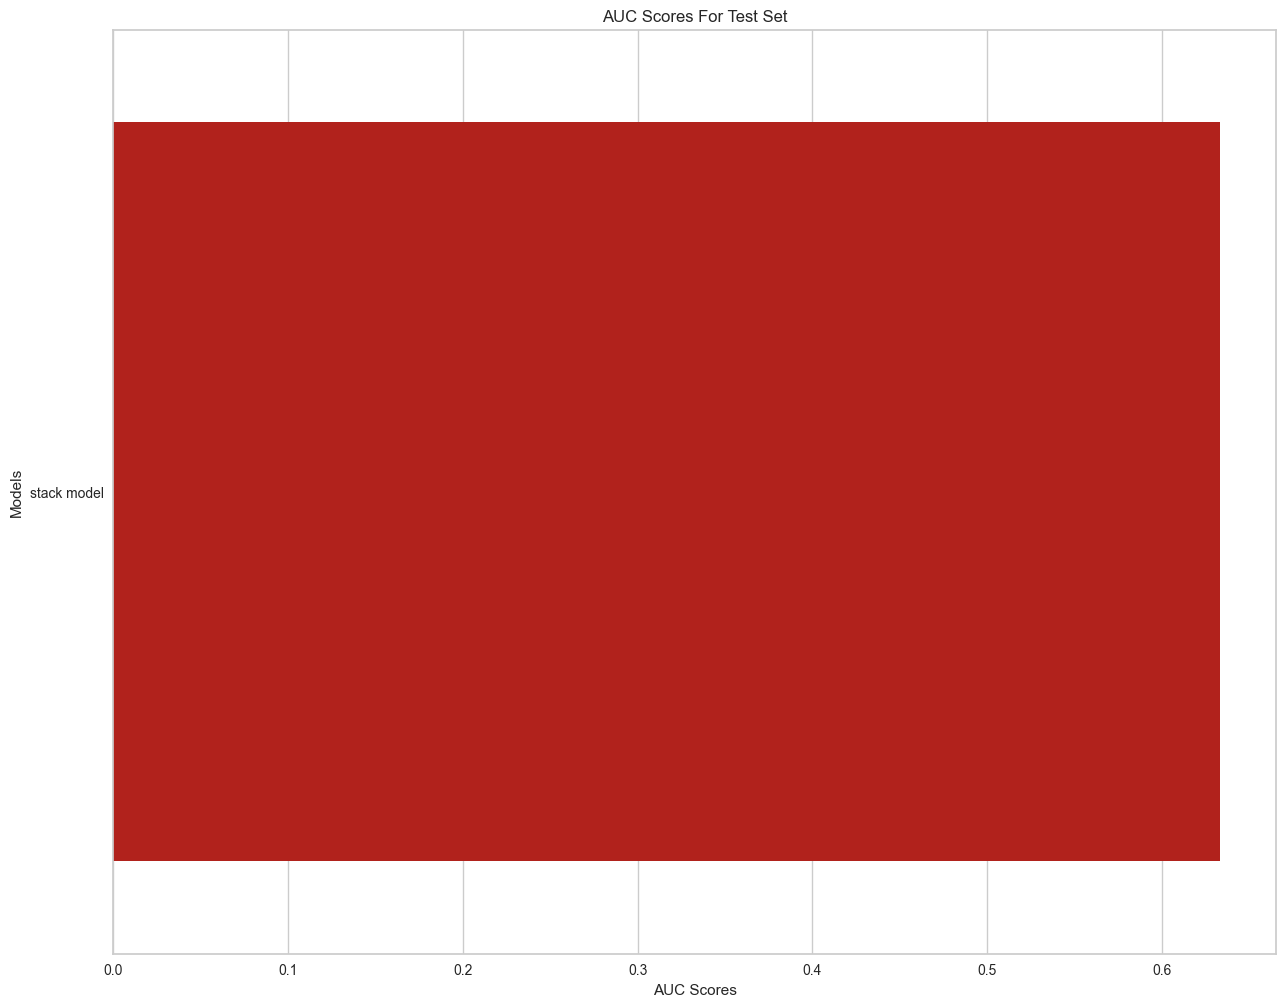

In [82]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=xgb_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


In [83]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [84]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

0.6172208013640238

In [85]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB15-stack73', Save_format = 'csv',Save_type = 'col')

In [35]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-01-g3/RFE-RF-GB/NB151")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [37]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [38]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/new-auc/testZscore-NB15.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [39]:
OSPath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-01-g3"

In [40]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB151/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-NB151-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.53      0.77      0.63        31
EGFR Mutated       0.53      0.28      0.36        29

    accuracy                           0.53        60
   macro avg       0.53      0.53      0.50        60
weighted avg       0.53      0.53      0.50        60

precision 0.5333333333333333 accuracy 0.5333333333333333 recall 0.27586206896551724 auc 0.525027808676307


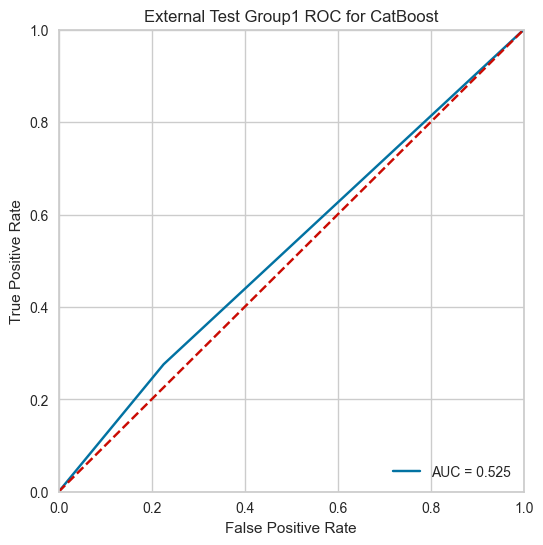

In [41]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [42]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[24  7]
 [21  8]]
Normalized confusion matrix
[[0.77 0.23]
 [0.72 0.28]]


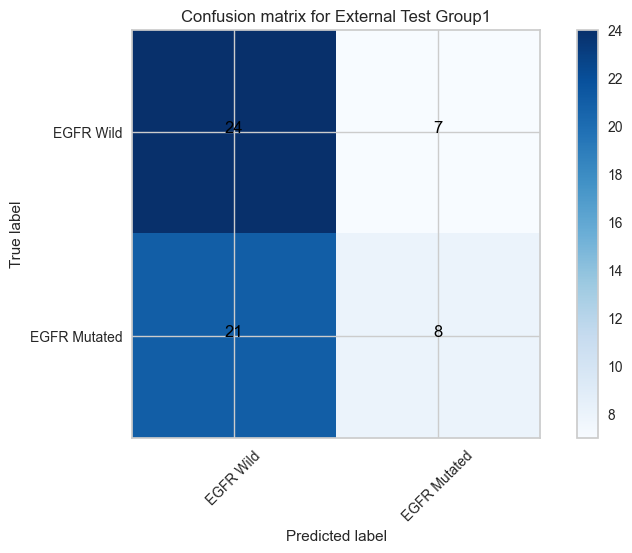

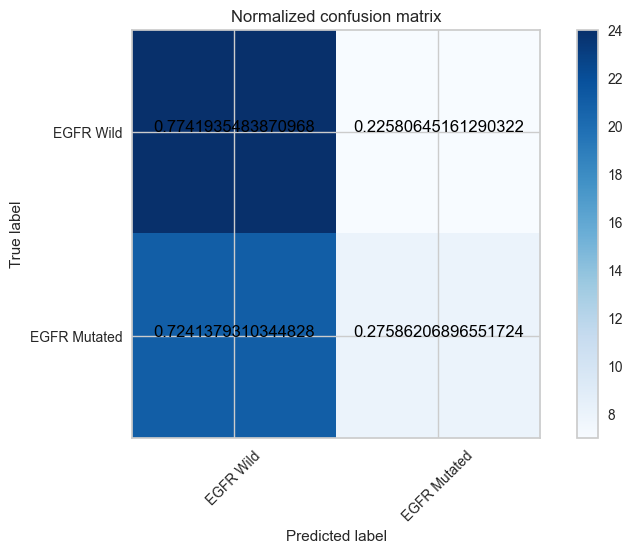

In [43]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [82]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB151/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-NB151-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.52      0.77      0.62        31
EGFR Mutated       0.50      0.24      0.33        29

    accuracy                           0.52        60
   macro avg       0.51      0.51      0.47        60
weighted avg       0.51      0.52      0.48        60

precision 0.5 accuracy 0.5166666666666667 recall 0.2413793103448276 auc 0.5077864293659622


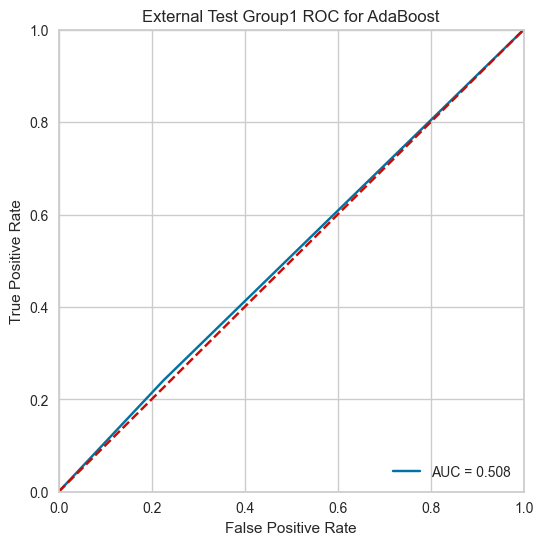

In [83]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [84]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[24  7]
 [22  7]]
Normalized confusion matrix
[[0.77 0.23]
 [0.76 0.24]]


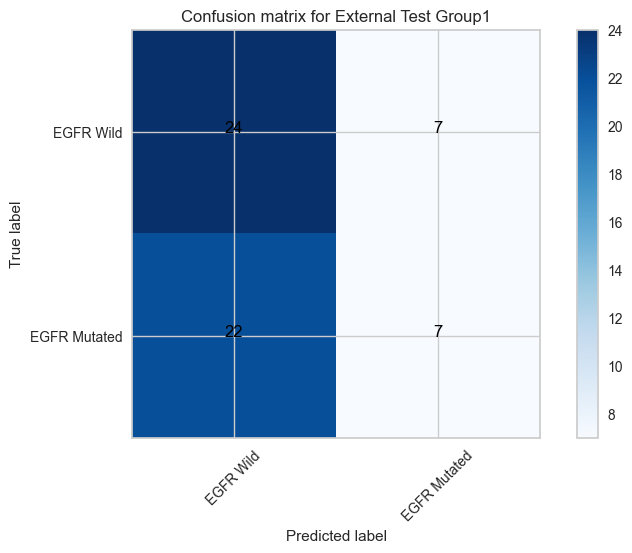

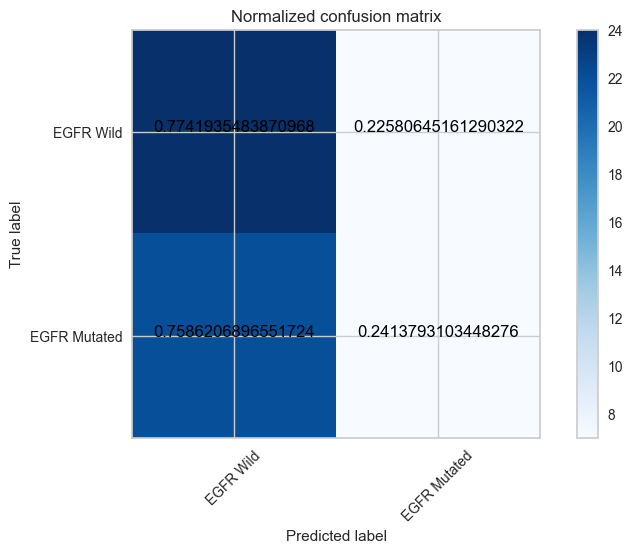

In [85]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [86]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB151/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-NB151-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

   EGFR Wild       0.53      0.94      0.67        31
EGFR Mutated       0.60      0.10      0.18        29

    accuracy                           0.53        60
   macro avg       0.56      0.52      0.43        60
weighted avg       0.56      0.53      0.43        60

precision 0.5636363636363636 accuracy 0.5333333333333333 recall 0.5194660734149055 auc 0.5194660734149055


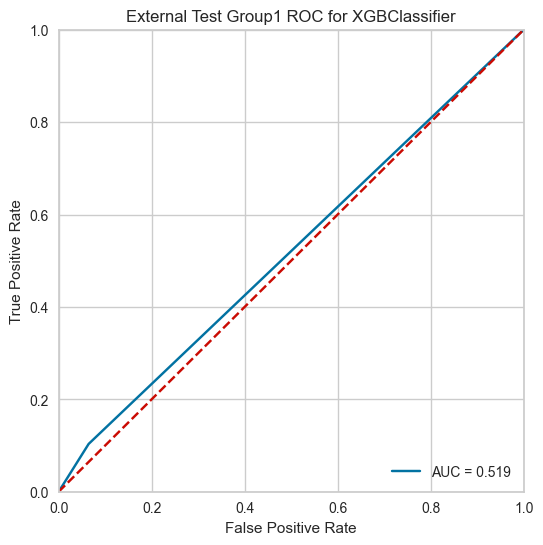

In [87]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [88]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[29  2]
 [26  3]]
Normalized confusion matrix
[[0.94 0.06]
 [0.9  0.1 ]]


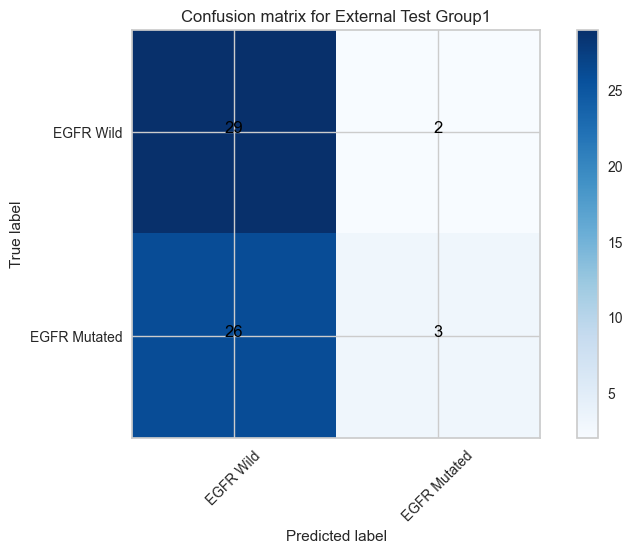

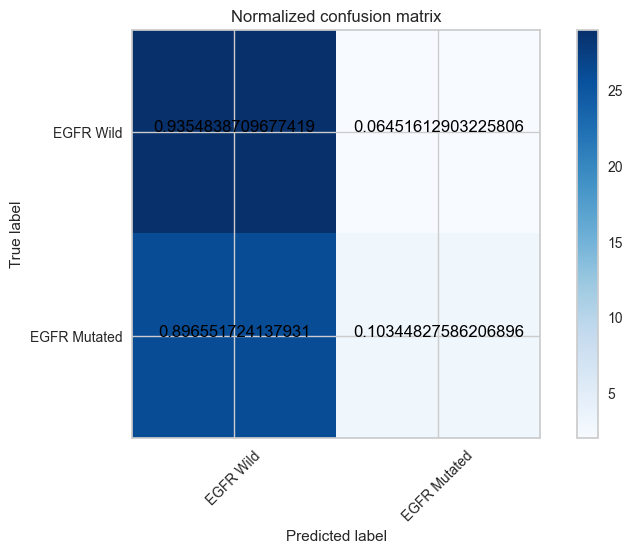

In [89]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [90]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB151/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-NB151-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.55      0.87      0.67        31
EGFR Mutated       0.64      0.24      0.35        29

    accuracy                           0.57        60
   macro avg       0.59      0.56      0.51        60
weighted avg       0.59      0.57      0.52        60

precision 0.6363636363636364 accuracy 0.5666666666666667 recall 0.2413793103448276 auc 0.5561735261401558


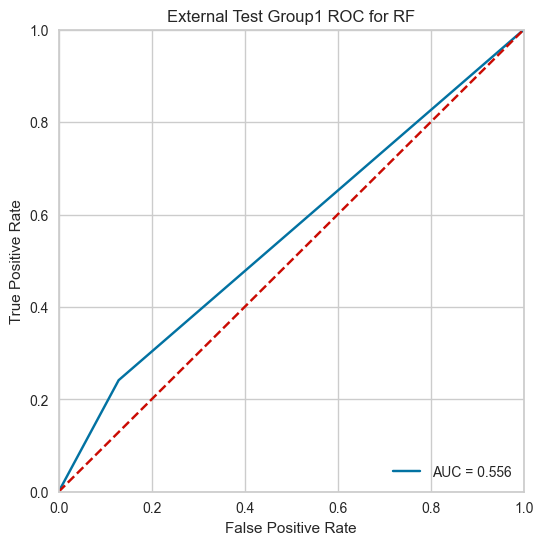

In [91]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[27  4]
 [22  7]]
Normalized confusion matrix
[[0.87 0.13]
 [0.76 0.24]]


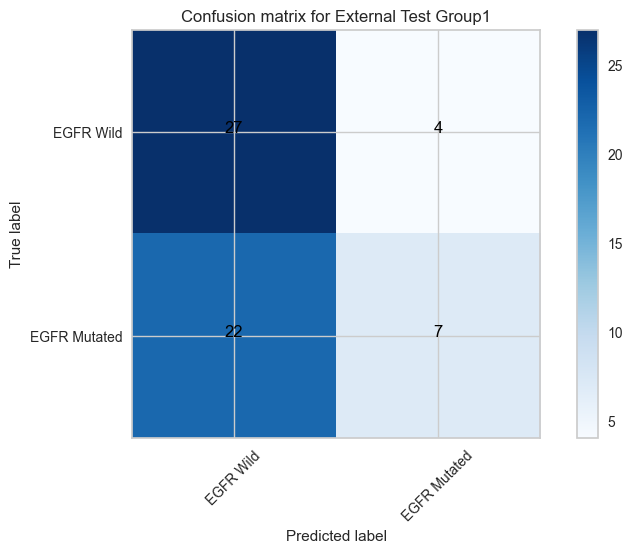

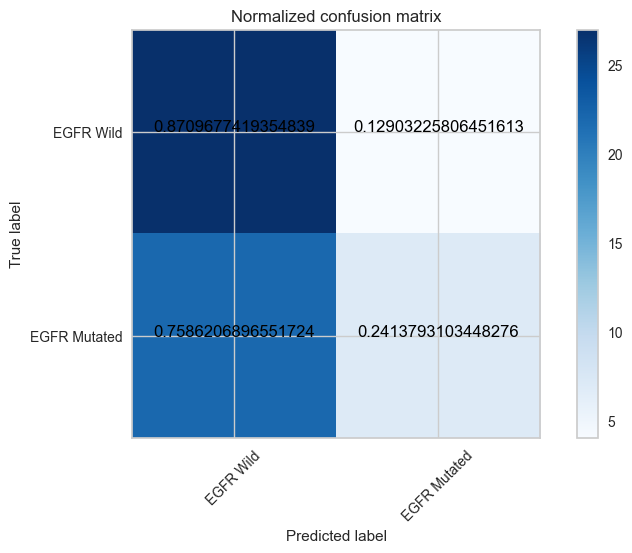

In [92]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [93]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB151/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-NB151-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.57      0.90      0.70        31
EGFR Mutated       0.73      0.28      0.40        29

    accuracy                           0.60        60
   macro avg       0.65      0.59      0.55        60
weighted avg       0.65      0.60      0.56        60

precision 0.7272727272727273 accuracy 0.6 recall 0.27586206896551724 auc 0.5895439377085652


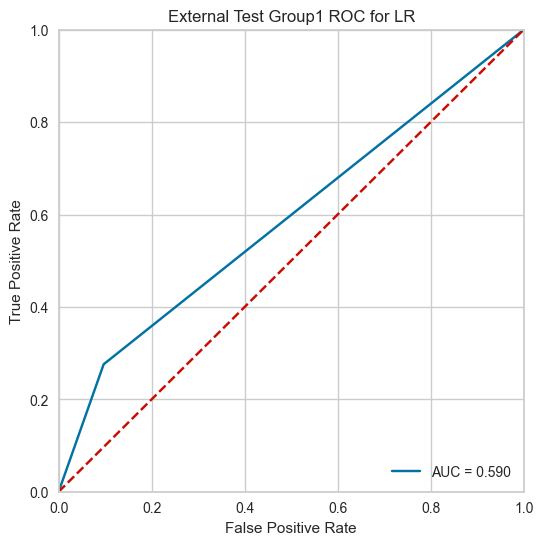

In [94]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[28  3]
 [21  8]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.72 0.28]]


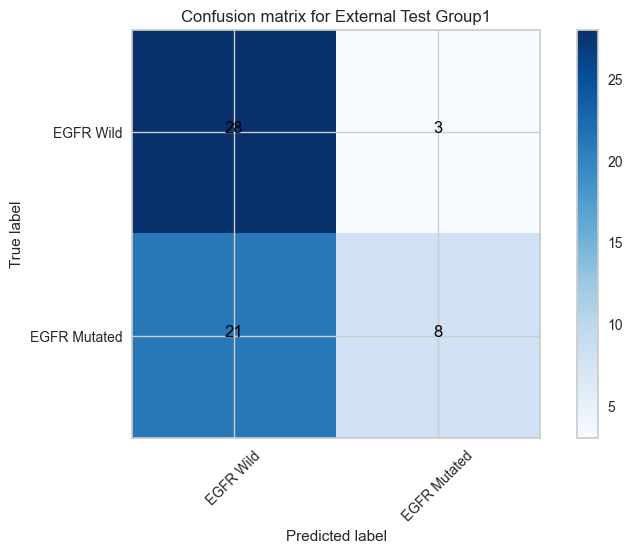

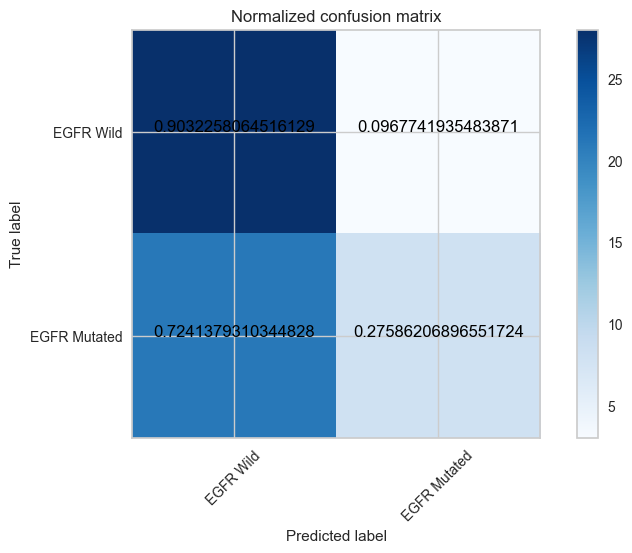

In [95]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [96]:
##DT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB151/DT.pkl'
finalpkl =  OSPath + pathpkl
dt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=dt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-DT-NB151-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.52      1.00      0.68        31
EGFR Mutated       0.00      0.00      0.00        29

    accuracy                           0.52        60
   macro avg       0.26      0.50      0.34        60
weighted avg       0.27      0.52      0.35        60

precision 0.0 accuracy 0.5166666666666667 recall 0.0 auc 0.5


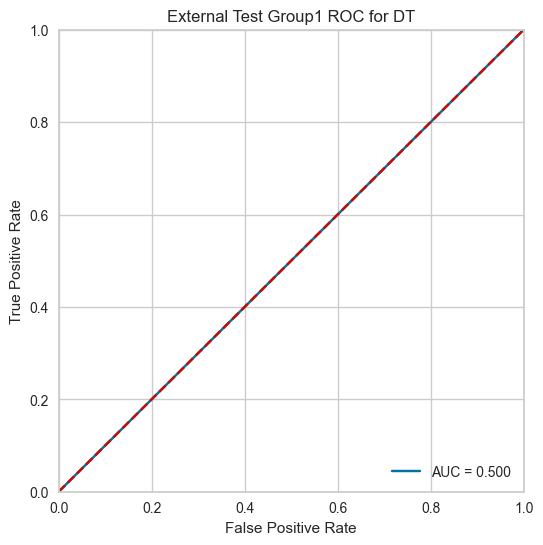

In [97]:
######dt 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[31  0]
 [29  0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


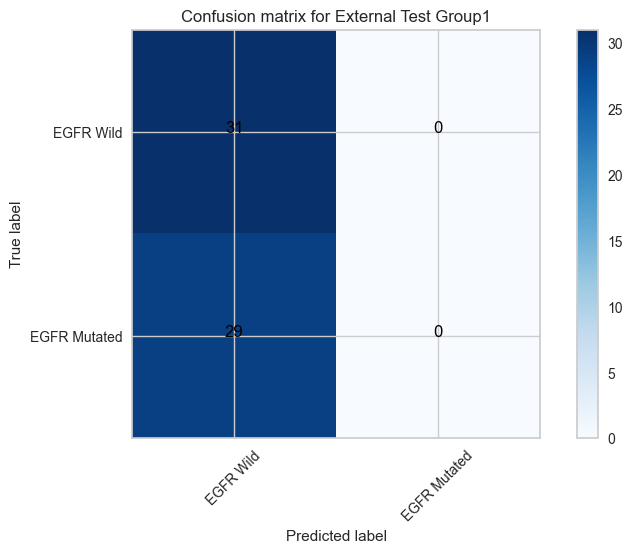

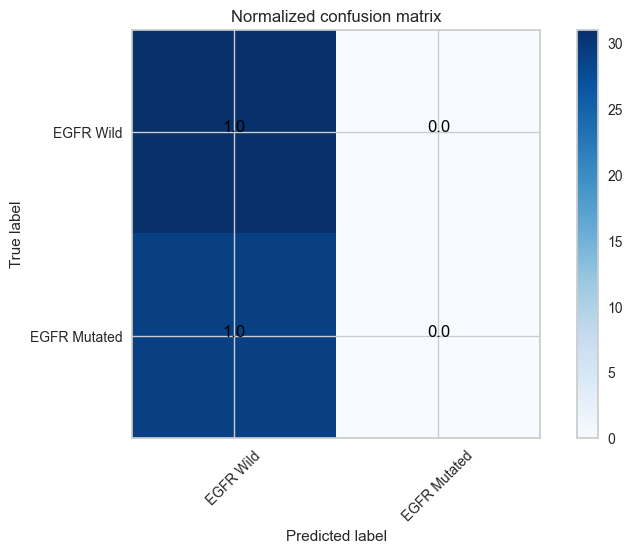

In [98]:
##dt 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [99]:
##NGB 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB151/NGBoost.pkl'
finalpkl =  OSPath + pathpkl
ngb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=ngb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-ngb-NB151-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.53      0.87      0.66        31
EGFR Mutated       0.56      0.17      0.26        29

    accuracy                           0.53        60
   macro avg       0.54      0.52      0.46        60
weighted avg       0.54      0.53      0.47        60

precision 0.5555555555555556 accuracy 0.5333333333333333 recall 0.1724137931034483 auc 0.5216907675194662


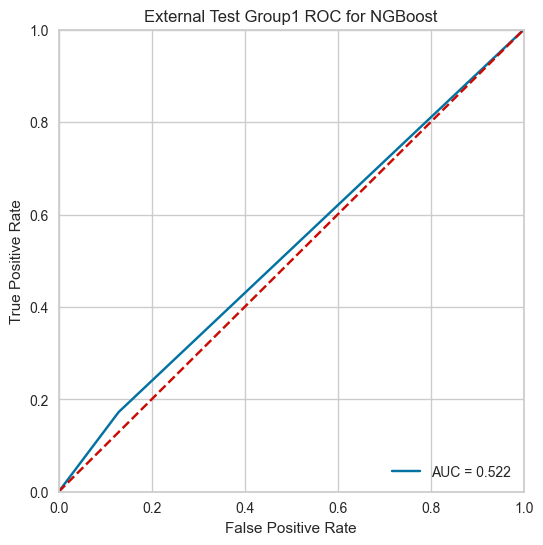

In [100]:
##NGB 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for NGBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[27  4]
 [24  5]]
Normalized confusion matrix
[[0.87 0.13]
 [0.83 0.17]]


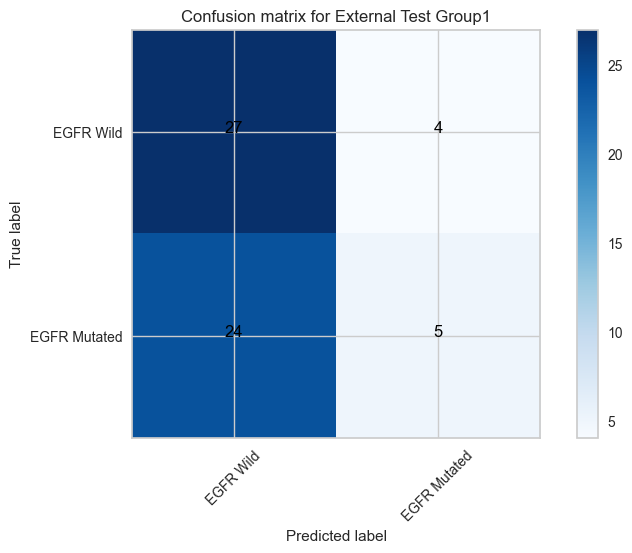

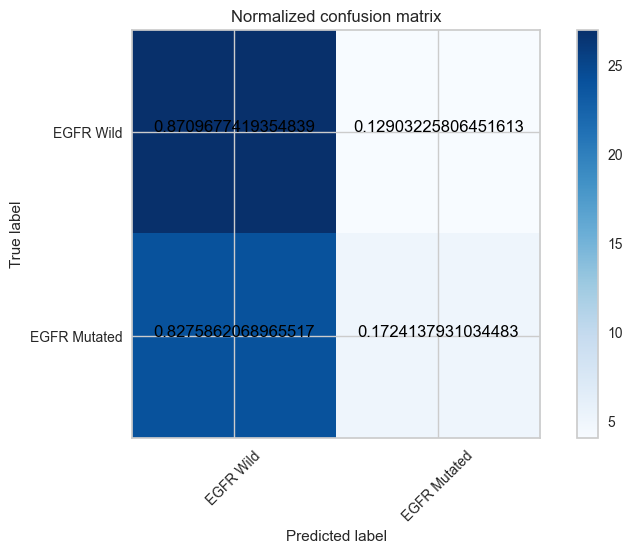

In [101]:
##NGB 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [102]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB151/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-NB151-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.52      0.71      0.60        31
EGFR Mutated       0.50      0.31      0.38        29

    accuracy                           0.52        60
   macro avg       0.51      0.51      0.49        60
weighted avg       0.51      0.52      0.50        60

precision 0.5 accuracy 0.5166666666666667 recall 0.3103448275862069 auc 0.5100111234705228


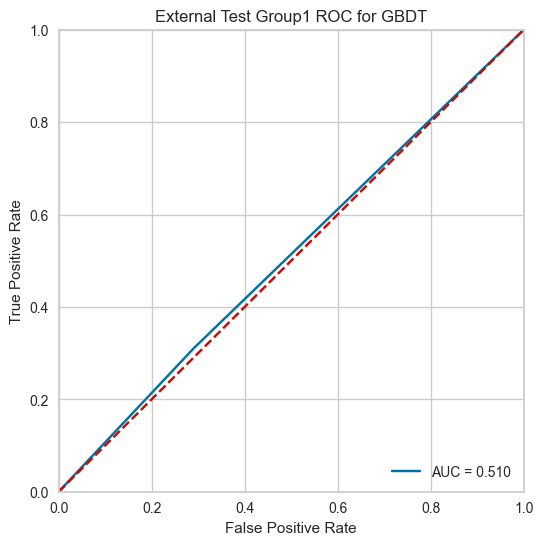

In [103]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[22  9]
 [20  9]]
Normalized confusion matrix
[[0.71 0.29]
 [0.69 0.31]]


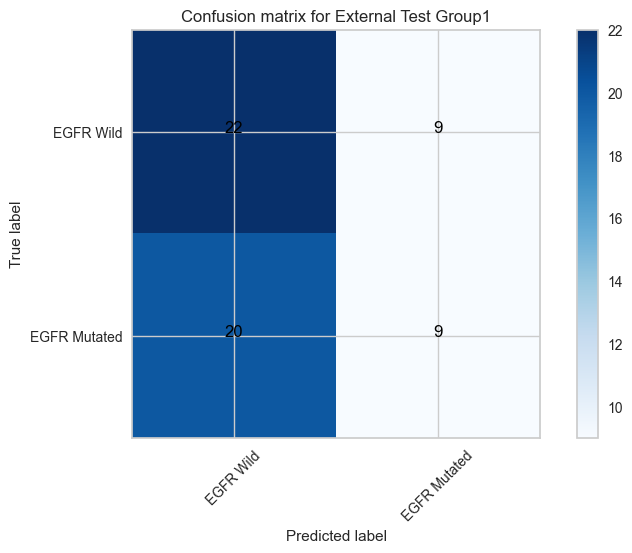

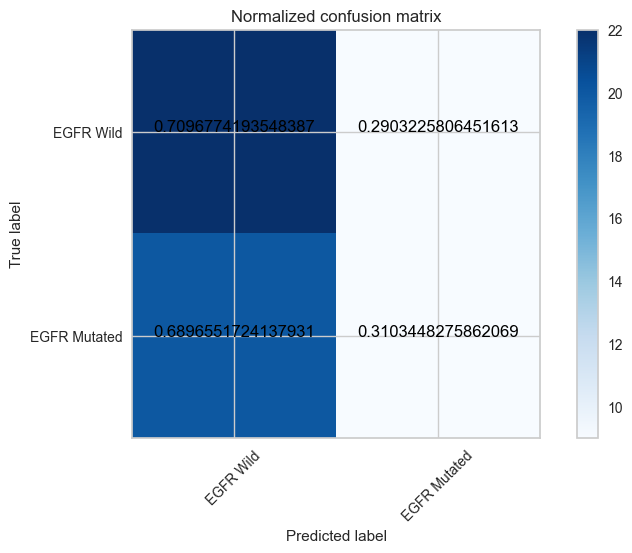

In [104]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [105]:
##svm 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB151/SVM.pkl'
finalpkl =  OSPath + pathpkl
svmt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=svmt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-SVM-NB151-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.54      0.90      0.67        31
EGFR Mutated       0.62      0.17      0.27        29

    accuracy                           0.55        60
   macro avg       0.58      0.54      0.47        60
weighted avg       0.58      0.55      0.48        60

precision 0.625 accuracy 0.55 recall 0.1724137931034483 auc 0.5100111234705228


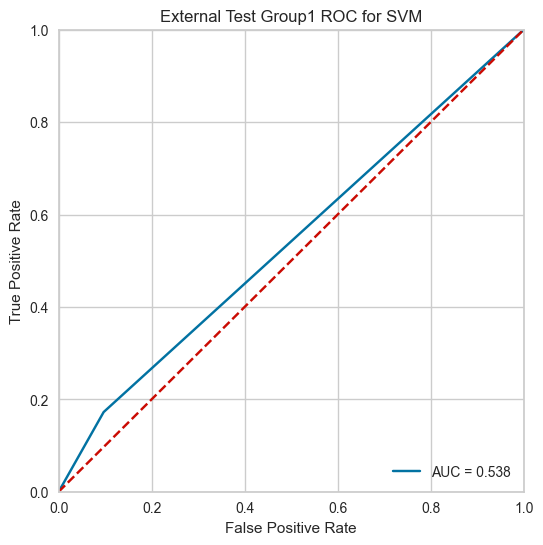

In [106]:
##svm 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[28  3]
 [24  5]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.83 0.17]]


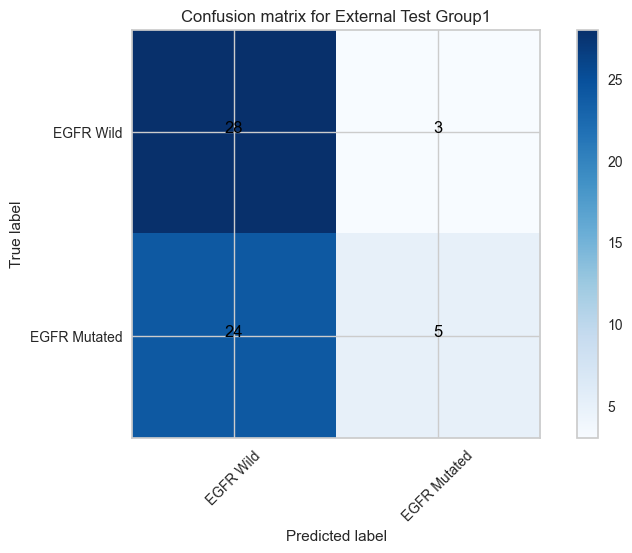

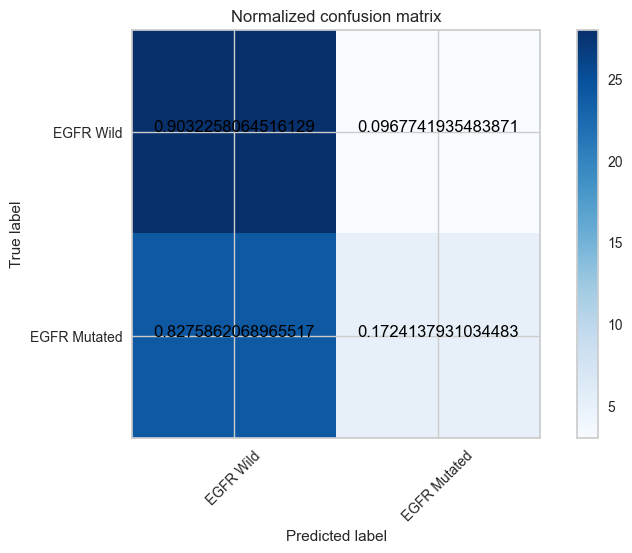

In [107]:
##svm 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [108]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB151/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-NB151-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.52      0.90      0.66        31
EGFR Mutated       0.50      0.10      0.17        29

    accuracy                           0.52        60
   macro avg       0.51      0.50      0.42        60
weighted avg       0.51      0.52      0.42        60

precision 0.5 accuracy 0.5166666666666667 recall 0.10344827586206896 auc 0.503337041156841


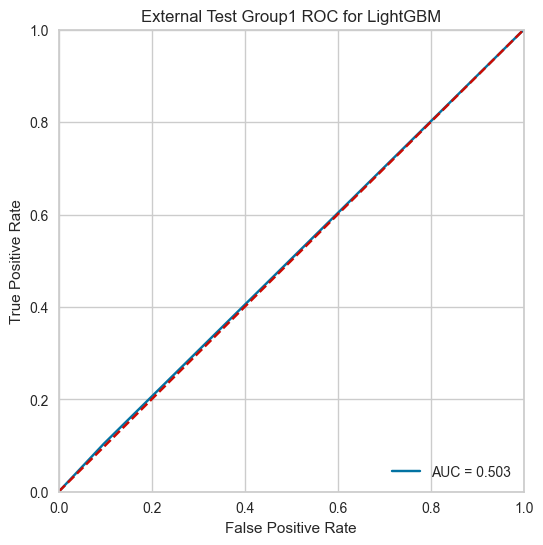

In [109]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[28  3]
 [26  3]]
Normalized confusion matrix
[[0.9 0.1]
 [0.9 0.1]]


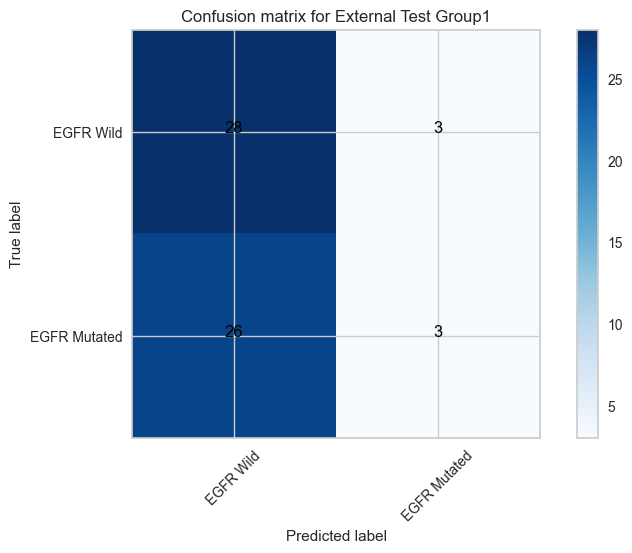

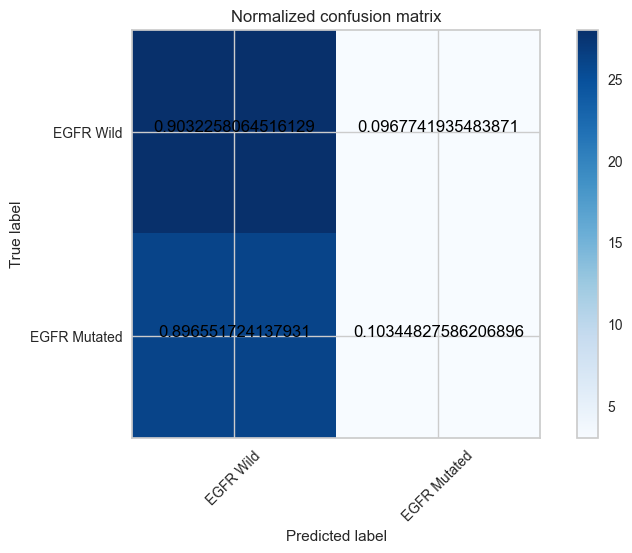

In [110]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()